## Semester Project: Effect of Environmental Factors on Benthic Invertebrate Populations in the South Bay Area
### Author: Quincy Kapsner, 826683540
Due Date: Sunday, April 28, 11:59PM

CS577 Spring 2024


## Data Exploration, Cleaning, and Feature Engineering

In [1291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [1292]:
# load all datasets
benthic_invs = pd.read_csv('benthic_invertebrates.csv')

ocean_chem_2020 = pd.read_csv('SBOO_ocean_chemistry_2020_datasd.csv')
ocean_chem_2021 = pd.read_csv('SBOO_ocean_chemistry_2021_datasd.csv')
ocean_chem_2022 = pd.read_csv('SBOO_ocean_chemistry_2022_datasd.csv')

salinity_2020 = pd.read_csv('SBOO_salinity_2020_datasd.csv')
salinity_2021 = pd.read_csv('SBOO_salinity_2021_datasd.csv')
salinity_2022 = pd.read_csv('SBOO_salinity_2022_datasd.csv')

water_quality_2020 = pd.read_csv('SBOO_water_quality_2020_datasd.csv')
water_quality_2021 = pd.read_csv('SBOO_water_quality_2021_datasd.csv')
water_quality_2022 = pd.read_csv('SBOO_water_quality_2022_datasd.csv')

water_temp_2020 = pd.read_csv('SBOO_water_temperature_2020_datasd.csv')
water_temp_2021 = pd.read_csv('SBOO_water_temperature_2021_datasd.csv')
water_temp_2022 = pd.read_csv('SBOO_water_temperature_2022_datasd.csv')


C:\Users\there\AppData\Local\Temp\ipykernel_7816\1667275540.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  benthic_invs = pd.read_csv('benthic_invertebrates.csv')


In [1293]:
# merge the dataframes by subject (so that they are not split by year)

# ocean_chem
ocean_chem = pd.concat([ocean_chem_2020, ocean_chem_2021, ocean_chem_2022], ignore_index=True)

# salinity
salinity = pd.concat([salinity_2020, salinity_2021, salinity_2022], ignore_index=True)

# water_quality
water_quality = pd.concat([water_quality_2020, water_quality_2021, water_quality_2022], ignore_index=True)

# water_temp
water_temp = pd.concat([water_temp_2020, water_temp_2021, water_temp_2022], ignore_index=True)

# note: all data from 2021 only has stuff from nov - dec

### Population Data 

In [1294]:
# look at benthic_invertebrates
print(benthic_invs.info())
print()
print(benthic_invs.describe())
print()
benthic_invs


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257602 entries, 0 to 257601
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   sample       257602 non-null  object
 1   station      257602 non-null  object
 2   date_sample  257602 non-null  object
 3   taxa_name    257602 non-null  object
 4   abundance    257602 non-null  int64 
 5   project      257602 non-null  object
 6   depth_m      257602 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 13.8+ MB
None

           abundance        depth_m
count  257602.000000  257602.000000
mean        4.185080      74.179016
std        19.754604      33.865305
min         1.000000       5.000000
25%         1.000000      36.000000
50%         2.000000      88.000000
75%         3.000000      98.000000
max      2626.000000     118.000000



,sample,station,date_sample,taxa_name,abundance,project,depth_m
0,BE0001,E2,1991-07-19,Acoetes pacifica,2,PL,98
1,BE0001,E2,1991-07-19,Ampelisca careyi,3,PL,98
2,BE0001,E2,1991-07-19,Ampelisca sp,1,PL,98
3,BE0001,E2,1991-07-19,Ampharete finmarchica,1,PL,98
4,BE0001,E2,1991-07-19,Amphichondrius granulatus,3,PL,98
...,...,...,...,...,...,...,...
257597,2207148396,E9,2022-07-14,Tanaopsis cadieni,2,PL,114
257598,2207148396,E9,2022-07-14,Terebellides californica,1,PL,114
257599,2207148396,E9,2022-07-14,Travisia brevis,2,PL,114
257600,2207148396,E9,2022-07-14,Volvulella cylindrica,2,PL,114


In [1295]:
# rename taxa_name to species_name and date_sample to date (it's just easier for me)
benthic_invs.rename(columns={'taxa_name': 'species_name'}, inplace=True)
benthic_invs.rename(columns={'date_sample': 'date'}, inplace=True)


In [1296]:
# make the project values for south bay location be SB

print("benthic_invs: ", benthic_invs['project'].unique())
benthic_invs['project'] = benthic_invs['project'].replace('SBOO PD', 'SB')
benthic_invs['project'] = benthic_invs['project'].replace('SBOO', 'SB')
print("benthic_invs: ", benthic_invs['project'].unique())


benthic_invs:  ['PL' 'PL PD' 'SBOO PD' 'SBOO']
benthic_invs:  ['PL' 'PL PD' 'SB']


In [1297]:
# keeping data only from SB sites - we are only looking at the south bay area
print("\nbenthic_invs: ", benthic_invs['project'].unique())
benthic_invs = benthic_invs[benthic_invs['project'] == 'SB']
print("benthic_invs: ", benthic_invs['project'].unique())



benthic_invs:  ['PL' 'PL PD' 'SB']
benthic_invs:  ['SB']


In [1298]:
# removing unnecessary columns

# benthic_invs
print("benthic_invs: ", benthic_invs.columns)
# unnecessary cols: project (now unneeded bc non SB data has been filtered out), station, sample
cols = ['station', 'project', 'sample']
benthic_invs = benthic_invs.drop(columns=cols)


benthic_invs:  Index(['sample', 'station', 'date', 'species_name', 'abundance', 'project',
       'depth_m'],
      dtype='object')


In [1299]:
# removing population data from before 2020 - only data from 2020-2022 is needed because those are the years the water data span

# converting to datetime
benthic_invs['date'] = pd.to_datetime(benthic_invs['date'])

# filter
benthic_invs = benthic_invs[benthic_invs['date'] >= '2020-01-01']


In [1300]:
# check for missing data
# benthic_invs
print("benthic_invs: \n", benthic_invs.isnull().sum())


benthic_invs: 
 date            0
species_name    0
abundance       0
depth_m         0
dtype: int64


In [1301]:
# list the unique dates 
print("benthic_invs: ", benthic_invs['date'].unique())

# group data in the same month to all have the same date (the first of that month)
benthic_invs['date'] = pd.to_datetime(benthic_invs['date']).dt.to_period('M').dt.to_timestamp()


benthic_invs:  <DatetimeArray>
['2020-01-06 00:00:00', '2020-01-08 00:00:00', '2020-07-07 00:00:00',
 '2020-07-08 00:00:00', '2020-07-09 00:00:00', '2021-01-14 00:00:00',
 '2021-01-22 00:00:00', '2021-01-28 00:00:00', '2021-07-01 00:00:00',
 '2021-07-02 00:00:00', '2021-07-08 00:00:00', '2021-07-19 00:00:00',
 '2022-01-03 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-07-06 00:00:00', '2022-07-07 00:00:00', '2022-07-08 00:00:00']
Length: 18, dtype: datetime64[ns]


##### Changes for modeling

There are too many individual species to reasonably do analysis on or make a model off. So we'll make dataframes with total abundance based on date and depth.

In [1302]:
# make population dataframes that are the total abundance 

# print get different depths (ascending order)
print("benthic_invs: ", sorted(benthic_invs['depth_m'].unique()))
# round depths to the nearest 10
benthic_invs['depth_m'] = benthic_invs['depth_m'].apply(lambda x: round(x, -1))
# group by date and depth
benthic_pop = benthic_invs.groupby(['date', 'depth_m'])['abundance'].sum().reset_index()


benthic_invs:  [18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 51, 52, 54, 55, 57, 58, 60, 61]


In [1303]:
# make a rotated benthic_pop so that the depths are columns and rows are abundance at the dates
benthic_pop_rotated = benthic_pop.pivot(index='date', columns='depth_m', values='abundance')


In [1304]:
# finished population dataframes
benthic_pop

,date,depth_m,abundance
0,2020-01-01,20,1480
1,2020-01-01,30,1330
2,2020-01-01,40,634
3,2020-01-01,50,130
4,2020-01-01,60,1736
5,2020-07-01,20,2214
6,2020-07-01,30,2629
7,2020-07-01,40,993
8,2020-07-01,50,145
9,2020-07-01,60,919


In [1305]:
benthic_pop_rotated

depth_m,20,30,40,50,60
date,,,,,
2020-01-01,1480,1330,634,130,1736
2020-07-01,2214,2629,993,145,919
2021-01-01,943,1806,794,80,988
2021-07-01,2175,2207,826,219,950
2022-01-01,1378,1525,1114,198,948
2022-07-01,2242,3751,1552,254,1747


### Water Data

In [1306]:
# removing unnecessary columns

# ocean_chem
print("ocean_chem: ", ocean_chem.columns)
# unnecessary cols: project (all are SB), Deployment#, unixtime_1000_gmt (covered by datetime_pst)
cols = ['project', 'Deployment#', 'unixtime_1000_gmt']
ocean_chem = ocean_chem.drop(columns=cols)

# salinity
print("salinity: ", salinity.columns)
# unnecessary cols: project (all are SB), Deployment#, unixtime_1000_gmt (covered by datetime_pst), parameter (all are Salinity), units (all are PSU, will be preserved later in value col name)
cols = ['project', 'Deployment#', 'unixtime_1000_gmt', 'parameter', 'units']
salinity = salinity.drop(columns=cols)

# water_quality
print("water_quality: ", water_quality.columns)
# unnecessary cols: project (all are SB), Deployment#, unixtime_1000_gmt (covered by datetime_pst)
cols = ['project', 'Deployment#', 'unixtime_1000_gmt']
water_quality = water_quality.drop(columns=cols)

# water_temp
print("water_temp: ", water_temp.columns)
# unnecessary cols: project (all are SB), Deployment#, unixtime_1000_gmt (covered by datetime_pst), parameter (all are Water temperature), units (all are degrees Celsius, will be preserved later in value col name)
cols = ['project', 'Deployment#', 'unixtime_1000_gmt', 'parameter', 'units']
water_temp = water_temp.drop(columns=cols)


ocean_chem:  Index(['project', 'Deployment#', 'unixtime_1000_gmt', 'datetime_pst',
       'depth_m', 'parameter', 'units', 'value', 'qualifier_flag'],
      dtype='object')
salinity:  Index(['project', 'Deployment#', 'unixtime_1000_gmt', 'datetime_pst',
       'depth_m', 'parameter', 'units', 'value', 'qualifier_flag'],
      dtype='object')
water_quality:  Index(['project', 'Deployment#', 'unixtime_1000_gmt', 'datetime_pst',
       'depth_m', 'parameter', 'units', 'value', 'qualifier_flag'],
      dtype='object')
water_temp:  Index(['project', 'Deployment#', 'unixtime_1000_gmt', 'datetime_pst',
       'depth_m', 'parameter', 'units', 'value', 'qualifier_flag'],
      dtype='object')


##### ocean_chem Cleaning/Preparation

In [1307]:
# look at ocean_chem
print(ocean_chem.info())
print()
print(ocean_chem.describe())
print()
ocean_chem


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524645 entries, 0 to 524644
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   datetime_pst    524645 non-null  object 
 1   depth_m         524645 non-null  float64
 2   parameter       524645 non-null  object 
 3   units           524645 non-null  object 
 4   value           415805 non-null  float64
 5   qualifier_flag  524645 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 24.0+ MB
None

             depth_m          value  qualifier_flag
count  524645.000000  415805.000000   524645.000000
mean       14.124517      14.638979        2.595153
std        11.435518      50.508373        3.070823
min         1.000000      -0.000000        1.000000
25%         1.000000       7.000000        1.000000
50%        18.000000       7.871000        1.000000
75%        26.000000       8.105000        1.000000
max        26.000000     609.790000  

,datetime_pst,depth_m,parameter,units,value,qualifier_flag
0,2020-01-01 00:00:00,1.0,Dissolved oxygen,mg/L,8.000,1
1,2020-01-01 00:00:00,18.0,Dissolved oxygen,mg/L,7.860,1
2,2020-01-01 00:00:00,26.0,Dissolved oxygen,mg/L,7.730,1
3,2020-01-01 00:10:00,1.0,Dissolved oxygen,mg/L,8.050,1
4,2020-01-01 00:10:00,18.0,Dissolved oxygen,mg/L,7.860,1
...,...,...,...,...,...,...
524640,2022-11-03 02:40:00,26.0,Total pH,pH units,NaN,3
524641,2022-11-03 02:50:00,1.0,Total pH,pH units,8.014,1
524642,2022-11-03 02:50:00,26.0,Total pH,pH units,NaN,3
524643,2022-11-03 03:00:00,1.0,Total pH,pH units,8.013,1


In [1308]:
# depth_m is float, but is an int for all other water data - turn it into an int
ocean_chem['depth_m'] = ocean_chem['depth_m'].astype('int64')


In [1309]:
# data is recorded every 10 minutes, but we don't need it this in depth
# average the value data for each day and get mode of qualifier

# get date from datetime_pst
ocean_chem['date'] = pd.to_datetime(ocean_chem['datetime_pst']).dt.date
# datetime_pst now unnecessary
ocean_chem = ocean_chem.drop(columns=['datetime_pst'])

# group by date, depth_m, parameter, and unit, then average the value
ocean_chem_mean = ocean_chem.groupby(['date', 'depth_m', 'parameter', 'units'])['value'].mean().reset_index()
# same group, mode of qualifier_flag
ocean_chem_mode = ocean_chem.groupby(['date', 'depth_m', 'parameter', 'units'])['qualifier_flag'].agg(lambda x: x.mode().iloc[0]).reset_index()

# merge mean and mode dataframes
ocean_chem = pd.merge(ocean_chem_mean, ocean_chem_mode, on=['date', 'depth_m', 'parameter', 'units'], how='left')

# make date a datetime object again
ocean_chem['date'] = pd.to_datetime(ocean_chem['date'])
# reset index
ocean_chem = ocean_chem.sort_values(by=['date', 'depth_m']).reset_index(drop=True)


In [1310]:
# split ocean_chem into different dataframes based off parameter (what is being measured)
# makes it easier to finish cleaning data

# get the different values 
print("ocean_chem: ", ocean_chem['parameter'].unique())

# o2
# make separate dataframes 
ocean_chem_o2 = ocean_chem[ocean_chem['parameter'] == 'Dissolved oxygen']
# unncecessary cols: parameter, units (all are the same per parameter)
cols = ['parameter', 'units']
ocean_chem_o2 = ocean_chem_o2.drop(columns=cols)
# rename value to be value_unit to preserve unit info
ocean_chem_o2.rename(columns={'value': 'value_mg/L'}, inplace=True)
# reset index
ocean_chem_o2 = ocean_chem_o2.reset_index(drop=True)

# nn
ocean_chem_nn = ocean_chem[ocean_chem['parameter'] == 'Nitrate + nitrite']
ocean_chem_nn = ocean_chem_nn.drop(columns=cols)
ocean_chem_nn.rename(columns={'value': 'value_uM'}, inplace=True)
ocean_chem_nn = ocean_chem_nn.reset_index(drop=True)

# xco2
ocean_chem_xco2 = ocean_chem[ocean_chem['parameter'] == 'Fraction dissolved carbon dioxide (xCO2)']
ocean_chem_xco2 = ocean_chem_xco2.drop(columns=cols)
ocean_chem_xco2.rename(columns={'value': 'value_ppm'}, inplace=True)
ocean_chem_xco2 = ocean_chem_xco2.reset_index(drop=True)

# ph
ocean_chem_ph = ocean_chem[ocean_chem['parameter'] == 'Total pH']
ocean_chem_ph = ocean_chem_ph.drop(columns=cols)
ocean_chem_ph.rename(columns={'value': 'value_pH'}, inplace=True)
ocean_chem_ph = ocean_chem_ph.reset_index(drop=True)


ocean_chem:  ['Dissolved oxygen' 'Fraction dissolved carbon dioxide (xCO2)'
 'Nitrate + nitrite' 'Total pH']


Qualifier Dictionary (from Ocean Monitoring Program)
* 1 - pass/good - For data reviewed both automatically and manually
* 2 - provisional/unreviewed - For data that is not reviewed; or data received review but quality could not be determined
* 3 - suspect/questionable - Flagged due to suspicious values for site/season; or as possible instrument drift (such as due to biofouling)
* 4 - bad - Flagged due to out of range for instrument; or manually flagged as clearly bad (such as due to instrument malfunction)
* 5 - value changed/drift-corrected - Used only in post-processing; values have been corrected based on new information, such as water sample results to correct for drift or new calibration factors. For data use purposes, this flag can be treated as a “pass”
* 9 - missing - Placeholder to show missing data; some gaps might be able to be filled in later by downloaded data


The qualifier_flag for each day was previously determined by the mode of the qualifiers for that day while getting average. Since the majority of the data for that day was flagged with that qualifier, that number can be reasonably applied to the averaged data. 

Data with flags 2, 3, and 5 can be considered as flag 1 for the purposes of this correlation analysis. Flags 4 and 9 will be treated as missing data. 

In [1311]:
# reorder by depth_m, then date
ocean_chem_o2 = ocean_chem_o2.sort_values(by=['depth_m', 'date'])
ocean_chem_nn = ocean_chem_nn.sort_values(by=['depth_m', 'date'])
ocean_chem_xco2 = ocean_chem_xco2.sort_values(by=['depth_m', 'date'])
ocean_chem_ph = ocean_chem_ph.sort_values(by=['depth_m', 'date'])


In [1312]:
# change any flags 2, 3, and 5 to be flag 1

# o2
ocean_chem_o2['qualifier_flag'] = ocean_chem_o2['qualifier_flag'].replace(2, 1)
ocean_chem_o2['qualifier_flag'] = ocean_chem_o2['qualifier_flag'].replace(3, 1)
ocean_chem_o2['qualifier_flag'] = ocean_chem_o2['qualifier_flag'].replace(5, 1)

# nn
ocean_chem_nn['qualifier_flag'] = ocean_chem_nn['qualifier_flag'].replace(2, 1)
ocean_chem_nn['qualifier_flag'] = ocean_chem_nn['qualifier_flag'].replace(3, 1)
ocean_chem_nn['qualifier_flag'] = ocean_chem_nn['qualifier_flag'].replace(5, 1)

# xco2
ocean_chem_xco2['qualifier_flag'] = ocean_chem_xco2['qualifier_flag'].replace(2, 1)
ocean_chem_xco2['qualifier_flag'] = ocean_chem_xco2['qualifier_flag'].replace(3, 1)
ocean_chem_xco2['qualifier_flag'] = ocean_chem_xco2['qualifier_flag'].replace(5, 1)

# ph
ocean_chem_ph['qualifier_flag'] = ocean_chem_ph['qualifier_flag'].replace(2, 1)
ocean_chem_ph['qualifier_flag'] = ocean_chem_ph['qualifier_flag'].replace(3, 1)
ocean_chem_ph['qualifier_flag'] = ocean_chem_ph['qualifier_flag'].replace(5, 1)

# change any flag 4 to be flag 9

# o2
ocean_chem_o2['qualifier_flag'] = ocean_chem_o2['qualifier_flag'].replace(4, 9)

# nn
ocean_chem_nn['qualifier_flag'] = ocean_chem_nn['qualifier_flag'].replace(4, 9)

# xco2
ocean_chem_xco2['qualifier_flag'] = ocean_chem_xco2['qualifier_flag'].replace(4, 9)

# ph
ocean_chem_ph['qualifier_flag'] = ocean_chem_ph['qualifier_flag'].replace(4, 9)


In [1313]:
# function to calculate groups of consecutive rows w qualifier n
def calculate_rows(df, n):
    start_date = None
    end_date = None
    group_count = 0

    for index, row in df.iterrows():
        if row['qualifier_flag'] == n:
            if start_date is None:
                start_date = row['date']
            group_count += 1
        else:
            if start_date is not None:
                end_date = row['date']
                print(f"Depth: {row['depth_m']}, Start Date: {start_date}, End Date: {end_date}, Num Rows: {group_count}")
                start_date = None
                end_date = None
                group_count = 0

In [1314]:
# o2 qualifier flags

# print counts of each flag
print(ocean_chem_o2['qualifier_flag'].value_counts())
# large number of rows have flag 9

# change all flag 9 to NaN (bc some days weren't completely missing, so were averaged when we averaged the day data)
ocean_chem_o2['value_mg/L'] = ocean_chem_o2['value_mg/L'].where(ocean_chem_o2['qualifier_flag'] != 9, other=None)

# see groups of consecutive rows with flag 9
calculate_rows(ocean_chem_o2, 9)
# there are large groups of data missing, rather than just random rows

# very large groups (70+ days or 3 months) should be dropped
# the rest can be interpolated based on time

# dropping large groups
ocean_chem_o2 = ocean_chem_o2.drop(ocean_chem_o2[(ocean_chem_o2['date'] >= '2020-09-23') & 
                                                 (ocean_chem_o2['date'] <= '2021-11-03') & 
                                                 (ocean_chem_o2['depth_m'] == 1)].index)
ocean_chem_o2 = ocean_chem_o2.drop(ocean_chem_o2[(ocean_chem_o2['date'] >= '2020-05-31') & 
                                                 (ocean_chem_o2['date'] <= '2021-11-03') & 
                                                 (ocean_chem_o2['depth_m'] == 18)].index)
ocean_chem_o2 = ocean_chem_o2.drop(ocean_chem_o2[(ocean_chem_o2['date'] >= '2020-07-28') & 
                                                 (ocean_chem_o2['date'] <= '2021-11-03') & 
                                                 (ocean_chem_o2['depth_m'] == 26)].index)
# note: these big groups are related to the huge data gap in 2021

# time-based interpolation
# make date column DatetimeIndex 
ocean_chem_o2.set_index('date', inplace=True)
# time-based interpolation
ocean_chem_o2['value_mg/L'] = ocean_chem_o2['value_mg/L'].interpolate(method='time')
# reset index
ocean_chem_o2.reset_index(inplace=True)

# there were no other flags than 9, so qualifier_flag column is no longer needed (as it will not be included in correlation analysis)
ocean_chem_o2 = ocean_chem_o2.drop(columns=['qualifier_flag'])


qualifier_flag
1    1658
9     451
Name: count, dtype: int64
Depth: 1, Start Date: 2020-09-23 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 74
Depth: 1, Start Date: 2022-02-16 00:00:00, End Date: 2022-02-25 00:00:00, Num Rows: 9
Depth: 18, Start Date: 2020-05-23 00:00:00, End Date: 2020-05-30 00:00:00, Num Rows: 7
Depth: 18, Start Date: 2020-05-31 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 189
Depth: 18, Start Date: 2022-01-31 00:00:00, End Date: 2022-02-01 00:00:00, Num Rows: 1
Depth: 18, Start Date: 2022-02-02 00:00:00, End Date: 2022-02-16 00:00:00, Num Rows: 14
Depth: 18, Start Date: 2022-03-14 00:00:00, End Date: 2022-03-25 00:00:00, Num Rows: 11
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 131
Depth: 26, Start Date: 2022-01-05 00:00:00, End Date: 2022-01-20 00:00:00, Num Rows: 15


In [1315]:
# nn qualifier flags

# counts
print(ocean_chem_nn['qualifier_flag'].value_counts())

# change flag 9 to be NaN
ocean_chem_nn['value_uM'] = ocean_chem_nn['value_uM'].where(ocean_chem_nn['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(ocean_chem_nn, 9)

# drop large groups
ocean_chem_nn = ocean_chem_nn.drop(ocean_chem_nn[(ocean_chem_nn['date'] >= '2020-10-01') & 
                                                 (ocean_chem_nn['date'] <= '2021-11-08') & 
                                                 (ocean_chem_nn['depth_m'] == 1)].index)
ocean_chem_nn = ocean_chem_nn.drop(ocean_chem_nn[(ocean_chem_nn['date'] >= '2020-08-17') & 
                                                 (ocean_chem_nn['date'] <= '2021-11-03') & 
                                                 (ocean_chem_nn['depth_m'] == 26)].index)

# time-based interpolation
ocean_chem_nn.set_index('date', inplace=True)
ocean_chem_nn['value_uM'] = ocean_chem_nn['value_uM'].interpolate(method='time')
ocean_chem_nn.reset_index(inplace=True)

# drop qualifier_flag col
ocean_chem_nn = ocean_chem_nn.drop(columns=['qualifier_flag'])


qualifier_flag
1    1141
9     289
Name: count, dtype: int64
Depth: 1, Start Date: 2020-08-10 00:00:00, End Date: 2020-08-11 00:00:00, Num Rows: 1
Depth: 1, Start Date: 2020-10-01 00:00:00, End Date: 2021-11-08 00:00:00, Num Rows: 83
Depth: 1, Start Date: 2021-11-19 00:00:00, End Date: 2021-11-22 00:00:00, Num Rows: 3
Depth: 1, Start Date: 2022-05-09 00:00:00, End Date: 2022-05-12 00:00:00, Num Rows: 3
Depth: 1, Start Date: 2022-05-21 00:00:00, End Date: 2022-05-22 00:00:00, Num Rows: 1
Depth: 1, Start Date: 2022-06-10 00:00:00, End Date: 2022-06-21 00:00:00, Num Rows: 11
Depth: 26, Start Date: 2020-04-13 00:00:00, End Date: 2020-04-14 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2020-07-15 00:00:00, End Date: 2020-07-17 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2020-08-15 00:00:00, Num Rows: 18
Depth: 26, Start Date: 2020-08-17 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 123
Depth: 26, Start Date: 2021-12-01 00:00:00, End Date: 2021-12-03 00:00

In [1316]:
# xco2 qualifier flags

# counts
print(ocean_chem_xco2['qualifier_flag'].value_counts())

# only one is missing, just drop it
ocean_chem_xco2 = ocean_chem_xco2[ocean_chem_xco2['qualifier_flag'] != 9]

# drop qualifier_flag col
ocean_chem_xco2 = ocean_chem_xco2.drop(columns=['qualifier_flag'])


qualifier_flag
1    680
9      1
Name: count, dtype: int64


In [1317]:
# ph qualifier flags

# counts
print(ocean_chem_ph['qualifier_flag'].value_counts())

# change flag 9 to NaN
ocean_chem_ph['value_pH'] = ocean_chem_ph['value_pH'].where(ocean_chem_ph['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(ocean_chem_ph, 9)

# drop large groups
ocean_chem_ph = ocean_chem_ph.drop(ocean_chem_ph[(ocean_chem_ph['date'] >= '2020-09-23') & 
                                                 (ocean_chem_ph['date'] <= '2021-11-03') & 
                                                 (ocean_chem_ph['depth_m'] == 1)].index)
ocean_chem_ph = ocean_chem_ph.drop(ocean_chem_ph[(ocean_chem_ph['date'] >= '2020-07-28') & 
                                                 (ocean_chem_ph['date'] <= '2021-11-03') & 
                                                 (ocean_chem_ph['depth_m'] == 26)].index)

# time-based interpolation
ocean_chem_ph.set_index('date', inplace=True)
ocean_chem_ph['value_pH'] = ocean_chem_ph['value_pH'].interpolate(method='time')
ocean_chem_ph.reset_index(inplace=True)

# drop qualifier_flag col
ocean_chem_ph = ocean_chem_ph.drop(columns=['qualifier_flag'])


qualifier_flag
1    1176
9     230
Name: count, dtype: int64
Depth: 1, Start Date: 2020-09-23 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 74
Depth: 1, Start Date: 2022-02-16 00:00:00, End Date: 2022-02-25 00:00:00, Num Rows: 9
Depth: 1, Start Date: 2022-04-19 00:00:00, End Date: 2022-04-20 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 131
Depth: 26, Start Date: 2022-01-05 00:00:00, End Date: 2022-01-20 00:00:00, Num Rows: 15


In [1318]:
# remerge the dataframes
ocean_chem = pd.concat([ocean_chem_o2, ocean_chem_nn, ocean_chem_xco2, ocean_chem_ph], ignore_index=True)

# merge rows with matching date, depth
ocean_chem = ocean_chem.groupby(['date', 'depth_m']).first().reset_index()


In [1319]:
# finished ocean_chem
ocean_chem.head(20)

,date,depth_m,value_mg/L,value_uM,value_ppm,value_pH
0,2020-01-01,1,8.050139,2.504391,385.345000,7.866299
1,2020-01-01,18,7.861667,NaN,NaN,NaN
2,2020-01-01,26,7.666597,2.399091,NaN,7.825875
3,2020-01-02,1,7.970347,3.496200,392.026667,7.860847
4,2020-01-02,18,7.948252,NaN,NaN,NaN
5,2020-01-02,26,7.719231,2.353529,NaN,7.829706
6,2020-01-03,1,8.056111,3.492650,390.925000,7.863889
7,2020-01-03,18,7.979931,NaN,NaN,NaN
8,2020-01-03,26,7.674097,2.126190,NaN,7.825681
9,2020-01-04,1,8.035625,3.495909,399.373333,7.863368


Done preparing ocean_chem data


##### salinity Cleaning/Preparation

In [1320]:
# look at salinity
print(salinity.info())
print()
print(salinity.describe())
print()
salinity


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396836 entries, 0 to 396835
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   datetime_pst    396836 non-null  object 
 1   depth_m         396836 non-null  int64  
 2   value           271413 non-null  float64
 3   qualifier_flag  396836 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.1+ MB
None

             depth_m          value  qualifier_flag
count  396836.000000  271413.000000   396836.000000
mean       13.750000      33.480659        2.622842
std         9.283734       0.123216        2.921969
min         1.000000      32.640000        1.000000
25%         7.750000      33.420000        1.000000
50%        14.000000      33.470000        1.000000
75%        20.000000      33.550000        3.000000
max        26.000000      34.090000        9.000000



,datetime_pst,depth_m,value,qualifier_flag
0,2020-01-01 00:00:00,1,33.35,1
1,2020-01-01 00:00:00,10,33.37,1
2,2020-01-01 00:00:00,18,33.43,1
3,2020-01-01 00:00:00,26,33.50,1
4,2020-01-01 00:10:00,1,33.38,1
...,...,...,...,...
396831,2022-11-03 02:50:00,26,33.26,1
396832,2022-11-03 03:00:00,1,33.50,1
396833,2022-11-03 03:00:00,10,33.41,1
396834,2022-11-03 03:00:00,18,NaN,3


In [1321]:
# rename value to value_psu to preserve unit info 
salinity.rename(columns={'value': 'value_psu'}, inplace=True)


In [1322]:
# data is recorded every 10 minutes, but we don't need it this in depth
# average the value data for each day and get mode of qualifier

# extract date from datetime_pst
salinity['date'] = pd.to_datetime(salinity['datetime_pst']).dt.date
# datetime_pst now unnecessary
salinity = salinity.drop(columns=['datetime_pst'])
# group by date and depth_m and average the value_psu
salinity_mean = salinity.groupby(['date', 'depth_m'])['value_psu'].mean().reset_index()
# same but get mode of qualifier_flag
salinity_mode = salinity.groupby(['date', 'depth_m'])['qualifier_flag'].agg(lambda x: x.mode().iloc[0]).reset_index()
# merge mean and mode dataframes
salinity = pd.merge(salinity_mean, salinity_mode, on=['date', 'depth_m'], how='left')
# make date a datetime object again
salinity['date'] = pd.to_datetime(salinity['date'])


In [1323]:
# reorder by depth_m, then date
salinity = salinity.sort_values(by=['depth_m', 'date'])


Same qualifier meanings as before

In [1324]:
# change any flags 2, 3, and 5 to be flag 1
salinity['qualifier_flag'] = salinity['qualifier_flag'].replace(2, 1)
salinity['qualifier_flag'] = salinity['qualifier_flag'].replace(3, 1)
salinity['qualifier_flag'] = salinity['qualifier_flag'].replace(5, 1)

# change any flag 4 to be flag 9
salinity['qualifier_flag'] = salinity['qualifier_flag'].replace(4, 9)


In [1325]:
# salinity qualifier flags

# counts
print(salinity['qualifier_flag'].value_counts())

# change flag 9 to NaN
salinity['value_psu'] = salinity['value_psu'].where(salinity['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(salinity, 9)

# drop large groups
salinity = salinity.drop(salinity[(salinity['date'] >= '2020-09-23') & 
                                  (salinity['date'] <= '2021-11-03') & 
                                  (salinity['depth_m'] == 1)].index)
salinity = salinity.drop(salinity[(salinity['date'] >= '2020-06-10') & 
                                  (salinity['date'] <= '2021-11-03') & 
                                  (salinity['depth_m'] == 18)].index)
salinity = salinity.drop(salinity[(salinity['date'] >= '2020-07-28') & 
                                  (salinity['date'] <= '2021-11-03') & 
                                  (salinity['depth_m'] == 26)].index)

# time-based interpolation
salinity.set_index('date', inplace=True)
salinity['value_psu'] = salinity['value_psu'].interpolate(method='time')
salinity.reset_index(inplace=True)

# drop qualifier_flag col
salinity = salinity.drop(columns=['qualifier_flag'])


qualifier_flag
1    2404
9     456
Name: count, dtype: int64
Depth: 1, Start Date: 2020-09-23 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 86
Depth: 1, Start Date: 2022-02-16 00:00:00, End Date: 2022-02-25 00:00:00, Num Rows: 9
Depth: 18, Start Date: 2020-06-10 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 191
Depth: 18, Start Date: 2022-02-14 00:00:00, End Date: 2022-02-15 00:00:00, Num Rows: 1
Depth: 18, Start Date: 2022-03-14 00:00:00, End Date: 2022-03-25 00:00:00, Num Rows: 11
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 143
Depth: 26, Start Date: 2022-01-05 00:00:00, End Date: 2022-01-20 00:00:00, Num Rows: 15


In [1326]:
# finished salinity
salinity.head(20)

,date,depth_m,value_psu
0,2020-01-01,1,33.420833
1,2020-01-02,1,33.398472
2,2020-01-03,1,33.397639
3,2020-01-04,1,33.374444
4,2020-01-05,1,33.352324
5,2020-01-06,1,33.440791
6,2020-01-07,1,33.477956
7,2020-01-08,1,33.416713
8,2020-01-09,1,33.493427
9,2020-01-10,1,33.496593


Done preparing salinity data


##### water_quality Cleaning/Preparation

In [1327]:
# look at water_quality
print(water_quality.info())
print()
print(water_quality.describe())
print()
water_quality


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967157 entries, 0 to 967156
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   datetime_pst    967157 non-null  object 
 1   depth_m         967157 non-null  int64  
 2   parameter       967157 non-null  object 
 3   units           967157 non-null  object 
 4   value           733713 non-null  float64
 5   qualifier_flag  967157 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 44.3+ MB
None

             depth_m          value  qualifier_flag
count  967157.000000  733713.000000   967157.000000
mean       15.907120       0.712827        1.999792
std        10.433647       0.858047        2.265968
min         1.000000       0.000000        1.000000
25%         1.000000       0.160000        1.000000
50%        18.000000       0.590000        1.000000
75%        26.000000       0.990000        1.000000
max        26.000000      29.400000  

,datetime_pst,depth_m,parameter,units,value,qualifier_flag
0,2020-01-01 00:00:00,1,Turbidity,NTU,0.40,1
1,2020-01-01 00:00:00,18,Turbidity,NTU,0.31,1
2,2020-01-01 00:00:00,26,Turbidity,NTU,0.26,1
3,2020-01-01 00:09:00,1,Turbidity,NTU,0.42,1
4,2020-01-01 00:09:00,18,Turbidity,NTU,0.27,1
...,...,...,...,...,...,...
967152,2022-11-03 02:51:00,18,Chlorophyll fluorescence,µg/L,0.46,1
967153,2022-11-03 02:51:00,26,Chlorophyll fluorescence,µg/L,0.48,1
967154,2022-11-03 03:00:00,1,Chlorophyll fluorescence,µg/L,0.19,1
967155,2022-11-03 03:00:00,18,Chlorophyll fluorescence,µg/L,0.46,1


In [1328]:
# data is recorded every 10 minutes, but we don't need it this in depth
# average the value data for each month and get mode of qualifier

# get date from datetime_pst
water_quality['date'] = pd.to_datetime(water_quality['datetime_pst']).dt.date
# datetime_pst now unnecessary
water_quality = water_quality.drop(columns=['datetime_pst'])

# group by date, depth_m, parameter, and unit, and average the value
water_quality_mean = water_quality.groupby(['date', 'depth_m', 'parameter', 'units'])['value'].mean().reset_index()
# same but get mode of qualifier_flag
water_quality_mode = water_quality.groupby(['date', 'depth_m', 'parameter', 'units'])['qualifier_flag'].agg(lambda x: x.mode().iloc[0]).reset_index()

# merge mean and mode dataframes
water_quality = pd.merge(water_quality_mean, water_quality_mode, on=['date', 'depth_m', 'parameter', 'units'], how='left')

# make date a datetime object again
water_quality['date'] = pd.to_datetime(water_quality['date'])
# reset index
water_quality = water_quality.sort_values(by=['date', 'depth_m']).reset_index(drop=True)


In [1329]:
# split water_quality into different dataframes based off parameter
# makes it easier to finish cleaning data

# get the different values
print("water_quality: ", water_quality['parameter'].unique())

# turb
# make separate dataframes
water_qual_turb = water_quality[water_quality['parameter'] == 'Turbidity']
# unnecessary cols: parameter, units 
cols = ['parameter', 'units']
water_qual_turb = water_qual_turb.drop(columns=cols)
# rename value to value_ntu to preserve unit info
water_qual_turb.rename(columns={'value': 'value_ntu'}, inplace=True)
# reset index
water_qual_turb = water_qual_turb.reset_index(drop=True)

# cdom
water_qual_cdom = water_quality[water_quality['parameter'] == 'Colored dissolved organic matter (CDOM) fluorescence equivalent']
water_qual_cdom = water_qual_cdom.drop(columns=cols)
water_qual_cdom.rename(columns={'value': 'value_ppb'}, inplace=True)
water_qual_cdom = water_qual_cdom.reset_index(drop=True)

# bod
water_qual_bod = water_quality[water_quality['parameter'] == 'Biological oxygen demand (BOD) equivalent']
water_qual_bod = water_qual_bod.drop(columns=cols)
water_qual_bod.rename(columns={'value': 'value_mg/L'}, inplace=True)
water_qual_bod = water_qual_bod.reset_index(drop=True)

# chlf
water_qual_chlf = water_quality[water_quality['parameter'] == 'Chlorophyll fluorescence']
water_qual_chlf = water_qual_chlf.drop(columns=cols)
water_qual_chlf.rename(columns={'value': 'value_ug/L'}, inplace=True)
water_qual_chlf = water_qual_chlf.reset_index(drop=True)


water_quality:  ['Chlorophyll fluorescence'
 'Colored dissolved organic matter (CDOM) fluorescence equivalent'
 'Turbidity' 'Biological oxygen demand (BOD) equivalent']


Same qualifier meanings as before

In [1330]:
# reorder by depth_m, then date
water_qual_turb = water_qual_turb.sort_values(by=['depth_m', 'date'])
water_qual_cdom = water_qual_cdom.sort_values(by=['depth_m', 'date'])
water_qual_bod = water_qual_bod.sort_values(by=['depth_m', 'date'])
water_qual_chlf = water_qual_chlf.sort_values(by=['depth_m', 'date'])


In [1331]:
# change any flags 2, 3, and 5 to be flag 1

# turb
water_qual_turb['qualifier_flag'] = water_qual_turb['qualifier_flag'].replace(2, 1)
water_qual_turb['qualifier_flag'] = water_qual_turb['qualifier_flag'].replace(3, 1)
water_qual_turb['qualifier_flag'] = water_qual_turb['qualifier_flag'].replace(5, 1)

# cdom
water_qual_cdom['qualifier_flag'] = water_qual_cdom['qualifier_flag'].replace(2, 1)
water_qual_cdom['qualifier_flag'] = water_qual_cdom['qualifier_flag'].replace(3, 1)
water_qual_cdom['qualifier_flag'] = water_qual_cdom['qualifier_flag'].replace(5, 1)

# bod
water_qual_bod['qualifier_flag'] = water_qual_bod['qualifier_flag'].replace(2, 1)
water_qual_bod['qualifier_flag'] = water_qual_bod['qualifier_flag'].replace(3, 1)
water_qual_bod['qualifier_flag'] = water_qual_bod['qualifier_flag'].replace(5, 1)

# chlf
water_qual_chlf['qualifier_flag'] = water_qual_chlf['qualifier_flag'].replace(2, 1)
water_qual_chlf['qualifier_flag'] = water_qual_chlf['qualifier_flag'].replace(3, 1)
water_qual_chlf['qualifier_flag'] = water_qual_chlf['qualifier_flag'].replace(5, 1)

# change any flag 4 to be flag 9

# turb
water_qual_turb['qualifier_flag'] = water_qual_turb['qualifier_flag'].replace(4, 9)

# cdom
water_qual_cdom['qualifier_flag'] = water_qual_cdom['qualifier_flag'].replace(4, 9)

# bod
water_qual_bod['qualifier_flag'] = water_qual_bod['qualifier_flag'].replace(4, 9)

# chlf
water_qual_chlf['qualifier_flag'] = water_qual_chlf['qualifier_flag'].replace(4, 9)


In [1332]:
# turb qualifier flags

# counts
print(water_qual_turb['qualifier_flag'].value_counts())

# change flag 9 to NaN
water_qual_turb['value_ntu'] = water_qual_turb['value_ntu'].where(water_qual_turb['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(water_qual_turb, 9)

# just 1 large group, but still needs to be dropped
water_qual_turb = water_qual_turb.drop(water_qual_turb[(water_qual_turb['date'] >= '2020-08-16') & 
                                                       (water_qual_turb['date'] <= '2021-11-03') & 
                                                       (water_qual_turb['depth_m'] == 26)].index)

# time-based interpolation
water_qual_turb.set_index('date', inplace=True)
water_qual_turb['value_ntu'] = water_qual_turb['value_ntu'].interpolate(method='time')
water_qual_turb.reset_index(inplace=True)

# drop qualifier_flag col
water_qual_turb = water_qual_turb.drop(columns=['qualifier_flag'])


qualifier_flag
1    1986
9     159
Name: count, dtype: int64
Depth: 26, Start Date: 2020-04-23 00:00:00, End Date: 2020-04-25 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2020-08-15 00:00:00, Num Rows: 18
Depth: 26, Start Date: 2020-08-16 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 124
Depth: 26, Start Date: 2022-02-11 00:00:00, End Date: 2022-02-15 00:00:00, Num Rows: 4
Depth: 26, Start Date: 2022-05-24 00:00:00, End Date: 2022-05-25 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-06-23 00:00:00, End Date: 2022-06-27 00:00:00, Num Rows: 4
Depth: 26, Start Date: 2022-07-05 00:00:00, End Date: 2022-07-06 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-07-11 00:00:00, End Date: 2022-07-12 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-08-14 00:00:00, End Date: 2022-08-15 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-09-11 00:00:00, End Date: 2022-09-13 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2022-09-16 00:00:00, End Date: 2022-09-17 0

In [1333]:
# cdom qualifier flags

# counts
print(water_qual_cdom['qualifier_flag'].value_counts())

# change flag 9 to NaN
water_qual_cdom['value_ppb'] = water_qual_cdom['value_ppb'].where(water_qual_cdom['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(water_qual_cdom, 9)

# drop the large group
water_qual_cdom = water_qual_cdom.drop(water_qual_cdom[(water_qual_cdom['date'] >= '2020-08-16') & 
                                                       (water_qual_cdom['date'] <= '2021-11-03') & 
                                                       (water_qual_cdom['depth_m'] == 26)].index)

# time-based interpolation
water_qual_cdom.set_index('date', inplace=True)
water_qual_cdom['value_ppb'] = water_qual_cdom['value_ppb'].interpolate(method='time')
water_qual_cdom.reset_index(inplace=True)

# drop qualifier_flag col
water_qual_cdom = water_qual_cdom.drop(columns=['qualifier_flag'])


qualifier_flag
1    1986
9     159
Name: count, dtype: int64
Depth: 26, Start Date: 2020-04-23 00:00:00, End Date: 2020-04-25 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2020-08-15 00:00:00, Num Rows: 18
Depth: 26, Start Date: 2020-08-16 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 124
Depth: 26, Start Date: 2022-02-11 00:00:00, End Date: 2022-02-15 00:00:00, Num Rows: 4
Depth: 26, Start Date: 2022-05-24 00:00:00, End Date: 2022-05-25 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-06-23 00:00:00, End Date: 2022-06-27 00:00:00, Num Rows: 4
Depth: 26, Start Date: 2022-07-05 00:00:00, End Date: 2022-07-06 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-07-11 00:00:00, End Date: 2022-07-12 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-08-14 00:00:00, End Date: 2022-08-15 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-09-11 00:00:00, End Date: 2022-09-13 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2022-09-16 00:00:00, End Date: 2022-09-17 0

In [1334]:
# bod qualifier flags

# counts
print(water_qual_bod['qualifier_flag'].value_counts())

# only 1 missing, just drop it
water_qual_bod = water_qual_bod[water_qual_bod['qualifier_flag'] != 9]

# drop qualifier_flag col
water_qual_bod = water_qual_bod.drop(columns=['qualifier_flag'])


qualifier_flag
1    627
9      1
Name: count, dtype: int64


In [1335]:
# chlf qualifier flags

# counts
print(water_qual_chlf['qualifier_flag'].value_counts())

# change flag 9 to NaN
water_qual_chlf['value_ug/L'] = water_qual_chlf['value_ug/L'].where(water_qual_chlf['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(water_qual_chlf, 9)

# drop the large group
water_qual_chlf = water_qual_chlf.drop(water_qual_chlf[(water_qual_chlf['date'] >= '2020-08-16') & 
                                                       (water_qual_chlf['date'] <= '2021-11-03') & 
                                                       (water_qual_chlf['depth_m'] == 26)].index)

# time-based interpolation
water_qual_chlf.set_index('date', inplace=True)
water_qual_chlf['value_ug/L'] = water_qual_chlf['value_ug/L'].interpolate(method='time')
water_qual_chlf.reset_index(inplace=True)

# drop qualifier_flag col
water_qual_chlf = water_qual_chlf.drop(columns=['qualifier_flag'])


qualifier_flag
1    1986
9     159
Name: count, dtype: int64
Depth: 26, Start Date: 2020-04-23 00:00:00, End Date: 2020-04-25 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2020-08-15 00:00:00, Num Rows: 18
Depth: 26, Start Date: 2020-08-16 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 124
Depth: 26, Start Date: 2022-02-11 00:00:00, End Date: 2022-02-15 00:00:00, Num Rows: 4
Depth: 26, Start Date: 2022-05-24 00:00:00, End Date: 2022-05-25 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-06-23 00:00:00, End Date: 2022-06-27 00:00:00, Num Rows: 4
Depth: 26, Start Date: 2022-07-05 00:00:00, End Date: 2022-07-06 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-07-11 00:00:00, End Date: 2022-07-12 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-08-14 00:00:00, End Date: 2022-08-15 00:00:00, Num Rows: 1
Depth: 26, Start Date: 2022-09-11 00:00:00, End Date: 2022-09-13 00:00:00, Num Rows: 2
Depth: 26, Start Date: 2022-09-16 00:00:00, End Date: 2022-09-17 0

In [1336]:
# remerge the dataframes
water_quality = pd.concat([water_qual_turb, water_qual_cdom, water_qual_bod, water_qual_chlf], ignore_index=True)

# merge rows with matching date, depth
water_quality = water_quality.groupby(['date', 'depth_m']).first().reset_index()


In [1337]:
# finished water_quality
water_quality.head(20)

,date,depth_m,value_ntu,value_ppb,value_mg/L,value_ug/L
0,2020-01-01,1,0.249784,1.067985,NaN,0.793188
1,2020-01-01,18,0.237692,1.173217,NaN,0.995385
2,2020-01-01,26,0.388286,1.273143,0.110964,0.695857
3,2020-01-02,1,0.220870,1.185145,NaN,0.737681
4,2020-01-02,18,0.156143,1.021214,NaN,0.961571
5,2020-01-02,26,0.291500,1.214143,0.108972,0.772786
6,2020-01-03,1,0.310657,1.246423,NaN,0.995839
7,2020-01-03,18,0.252411,1.161418,NaN,1.239149
8,2020-01-03,26,0.435324,1.278633,0.108259,0.807482
9,2020-01-04,1,0.361159,1.233261,NaN,1.042681


Done preparing water_quality data


##### water_temp Cleaning/Preparation

In [1338]:
# look at water_temp
print(water_temp.info())
print()
print(water_temp.describe())
print()
water_temp


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396836 entries, 0 to 396835
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   datetime_pst    396836 non-null  object 
 1   depth_m         396836 non-null  int64  
 2   value           331308 non-null  float64
 3   qualifier_flag  396836 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.1+ MB
None

             depth_m          value  qualifier_flag
count  396836.000000  331308.000000   396836.000000
mean       13.750000      14.891269        2.320979
std         9.283734       2.578713        2.970321
min         1.000000      10.049000        1.000000
25%         7.750000      13.034000        1.000000
50%        14.000000      14.783000        1.000000
75%        20.000000      15.956000        1.000000
max        26.000000      24.843000        9.000000



,datetime_pst,depth_m,value,qualifier_flag
0,2020-01-01 00:00:00,1,15.325,1
1,2020-01-01 00:00:00,10,15.420,1
2,2020-01-01 00:00:00,18,15.407,1
3,2020-01-01 00:00:00,26,15.094,1
4,2020-01-01 00:10:00,1,15.353,1
...,...,...,...,...
396831,2022-11-03 02:50:00,26,14.274,1
396832,2022-11-03 03:00:00,1,17.987,1
396833,2022-11-03 03:00:00,10,17.993,1
396834,2022-11-03 03:00:00,18,15.503,1


In [1339]:
# rename value to value_C to preserve unit info
water_temp.rename(columns={'value': 'value_C'}, inplace=True)


In [1340]:
# data is recorded every 10 minutes, but we don't need it this in depth
# average the value data for each day and get mode of qualifier

# extract date from datetime_pst
water_temp['date'] = pd.to_datetime(water_temp['datetime_pst']).dt.date
# datetime_pst now unnecessary
water_temp = water_temp.drop(columns=['datetime_pst'])
# group by date and depth_m and average the value_C
water_temp_mean = water_temp.groupby(['date', 'depth_m'])['value_C'].mean().reset_index()
# same but get mode of qualifier_flag
water_temp_mode = water_temp.groupby(['date', 'depth_m'])['qualifier_flag'].agg(lambda x: x.mode().iloc[0]).reset_index()
# merge mean and mode dataframes
water_temp = pd.merge(water_temp_mean, water_temp_mode, on=['date', 'depth_m'], how='left')
# make date a datetime object again
water_temp['date'] = pd.to_datetime(water_temp['date'])


In [1341]:
# reorder by depth_m, then date
water_temp = water_temp.sort_values(by=['depth_m', 'date'])


Same qualifier meanings as before

In [1342]:
# change any flags 2, 3, and 5 to be flag 1
water_temp['qualifier_flag'] = water_temp['qualifier_flag'].replace(2, 1)
water_temp['qualifier_flag'] = water_temp['qualifier_flag'].replace(3, 1)
water_temp['qualifier_flag'] = water_temp['qualifier_flag'].replace(5, 1)

# change any flag 4 to be flag 9
water_temp['qualifier_flag'] = water_temp['qualifier_flag'].replace(4, 9)


In [1343]:
# water_temp qualifier flags

# counts
print(water_temp['qualifier_flag'].value_counts())

# change flag 9 to NaN
water_temp['value_C'] = water_temp['value_C'].where(water_temp['qualifier_flag'] != 9, other=None)

# groups of flag 9
calculate_rows(water_temp, 9)

# drop large groups
water_temp = water_temp.drop(water_temp[(water_temp['date'] >= '2020-09-23') & 
                                        (water_temp['date'] <= '2021-11-03') & 
                                        (water_temp['depth_m'] == 1)].index)
water_temp = water_temp.drop(water_temp[(water_temp['date'] >= '2020-06-10') & 
                                        (water_temp['date'] <= '2021-11-03') & 
                                        (water_temp['depth_m'] == 1)].index)
water_temp = water_temp.drop(water_temp[(water_temp['date'] >= '2020-07-28') & 
                                        (water_temp['date'] <= '2021-11-03') & 
                                        (water_temp['depth_m'] == 1)].index)

# time-based interpolation
water_temp.set_index('date', inplace=True)
water_temp['value_C'] = water_temp['value_C'].interpolate(method='time')
water_temp.reset_index(inplace=True)

# drop qualifier_flag col
water_temp = water_temp.drop(columns=['qualifier_flag'])


qualifier_flag
1    2404
9     456
Name: count, dtype: int64
Depth: 1, Start Date: 2020-09-23 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 86
Depth: 1, Start Date: 2022-02-16 00:00:00, End Date: 2022-02-25 00:00:00, Num Rows: 9
Depth: 18, Start Date: 2020-06-10 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 191
Depth: 18, Start Date: 2022-02-14 00:00:00, End Date: 2022-02-15 00:00:00, Num Rows: 1
Depth: 18, Start Date: 2022-03-14 00:00:00, End Date: 2022-03-25 00:00:00, Num Rows: 11
Depth: 26, Start Date: 2020-07-28 00:00:00, End Date: 2021-11-03 00:00:00, Num Rows: 143
Depth: 26, Start Date: 2022-01-05 00:00:00, End Date: 2022-01-20 00:00:00, Num Rows: 15


In [1344]:
# finished water_temp
water_temp.head(20)

,date,depth_m,value_C
0,2020-01-01,1,15.521778
1,2020-01-02,1,15.585646
2,2020-01-03,1,15.610139
3,2020-01-04,1,15.424722
4,2020-01-05,1,15.343648
5,2020-01-06,1,15.456928
6,2020-01-07,1,15.735496
7,2020-01-08,1,15.476965
8,2020-01-09,1,15.736077
9,2020-01-10,1,15.594622


Done preparing water_temp data


##### All

In [1345]:
# before remerging, rename the value columns to be parameter_unit so they are unique
ocean_chem.rename(columns={'value_mg/L': 'o2_mg/L', 'value_uM': 'nn_uM', 
                           'value_ppm': 'xco2_ppm', 'value_pH': 'ph'}, inplace=True)

salinity.rename(columns={'value_psu': 'salinity_psu'}, inplace=True)

water_quality.rename(columns={'value_ntu': 'turb_ntu', 'value_ppb': 'cdom_ppb',
                              'value_mg/L': 'bod_mg/L', 'value_ug/L': 'chlf_ug/L'}, inplace=True)

water_temp.rename(columns={'value_C': 'temp_C'}, inplace=True)


In [1346]:
# merge all datasets 
water_data = pd.concat([ocean_chem, salinity, water_quality, water_temp], ignore_index=True)

# merge rows with matching date, depth
water_data = water_data.groupby(['date', 'depth_m']).first().reset_index()


In [1347]:
# get what depths each parameter has data for

print("o2_mg/L: ", water_data[water_data['o2_mg/L'].notnull()]['depth_m'].unique())
print("nn_uM: ", water_data[water_data['nn_uM'].notnull()]['depth_m'].unique())
print("xco2_ppm: ", water_data[water_data['xco2_ppm'].notnull()]['depth_m'].unique())
print("ph: ", water_data[water_data['ph'].notnull()]['depth_m'].unique())
print("salinity_psu: ", water_data[water_data['salinity_psu'].notnull()]['depth_m'].unique())
print("turb_ntu: ", water_data[water_data['turb_ntu'].notnull()]['depth_m'].unique())
print("cdom_ppb: ", water_data[water_data['cdom_ppb'].notnull()]['depth_m'].unique())
print("bod_mg/L: ", water_data[water_data['bod_mg/L'].notnull()]['depth_m'].unique())
print("chlf_ug/L: ", water_data[water_data['chlf_ug/L'].notnull()]['depth_m'].unique())
print("temp_C: ", water_data[water_data['temp_C'].notnull()]['depth_m'].unique())


o2_mg/L:  [ 1 18 26]
nn_uM:  [ 1 26]
xco2_ppm:  [1]
ph:  [ 1 26]
salinity_psu:  [ 1 10 18 26]
turb_ntu:  [ 1 18 26]
cdom_ppb:  [ 1 18 26]
bod_mg/L:  [26]
chlf_ug/L:  [ 1 18 26]
temp_C:  [ 1 10 18 26]


In [1348]:
# only salinity and temp were measured at depth 10, so drop depth 10 data
water_data = water_data.drop(water_data[water_data['depth_m'] == 10].index)


In [1349]:
# split water_data by depth
water_data_1 = water_data[water_data['depth_m'] == 1]
water_data_18 = water_data[water_data['depth_m'] == 18]
water_data_26 = water_data[water_data['depth_m'] == 26]

# depth_m cols now unnecessary
water_data_1 = water_data_1.drop(columns=['depth_m'])
water_data_18 = water_data_18.drop(columns=['depth_m'])
water_data_26 = water_data_26.drop(columns=['depth_m'])

# group by date and reset index
water_data_1 = water_data_1.groupby('date').first().reset_index()
water_data_18 = water_data_18.groupby('date').first().reset_index()
water_data_26 = water_data_26.groupby('date').first().reset_index()


In [1350]:
# drop xco2_ppm, nn_uM, ph, and bod from depth 18
water_data_18 = water_data_18.drop(columns=['xco2_ppm'])
water_data_18 = water_data_18.drop(columns=['nn_uM'])
water_data_18 = water_data_18.drop(columns=['ph'])
water_data_18 = water_data_18.drop(columns=['bod_mg/L'])

# drop xco2_ppm from depth 26
water_data_26 = water_data_26.drop(columns=['xco2_ppm'])

# drop bod_mg/L from depth 1 
water_data_1 = water_data_1.drop(columns=['bod_mg/L'])

In [1351]:
# there are null values where the different projects stopped gathering data for 2021

# 1
# print first and last 5 rows with null values, giving us the whole range that we need to drop
print(water_data_1[water_data_1.isnull().any(axis=1)])
# drop data in that range
water_data_1 = water_data_1.drop(water_data_1[(water_data_1['date'] >= '2020-05-10') & 
                                              (water_data_1['date'] <= '2021-11-03')].index)

print('\n----------------------------------------------------------------------------------------------------------\n')

# 18
print(water_data_18[water_data_18.isnull().any(axis=1)])
water_data_18 = water_data_18.drop(water_data_18[(water_data_18['date'] >= '2020-05-31') & 
                                                (water_data_18['date'] <= '2021-11-03')].index)

print('\n----------------------------------------------------------------------------------------------------------\n')

# 26
print(water_data_26[water_data_26.isnull().any(axis=1)])
water_data_26 = water_data_26.drop(water_data_26[(water_data_26['date'] >= '2020-05-31') & 
                                                (water_data_26['date'] <= '2021-11-03')].index)


          date    o2_mg/L     nn_uM  xco2_ppm        ph  salinity_psu  \
130 2020-05-10  12.858889  1.420000       NaN  8.321889     33.550000   
132 2020-05-12  11.818500  1.653333       NaN  8.273650     33.579250   
135 2020-05-18   9.297632  1.196000       NaN  8.101821     33.600263   
158 2020-06-10   7.294960  2.865045   454.740  7.791071     33.582712   
159 2020-06-11   7.807246  1.226647   433.855  7.840522     33.582555   
..         ...        ...       ...       ...       ...           ...   
710 2022-10-30   8.562014  3.990417       NaN  8.067090     33.487413   
711 2022-10-31   8.079028  3.990417       NaN  8.036979     33.531049   
712 2022-11-01   7.794792  3.990417       NaN  8.028722     33.571678   
713 2022-11-02   7.919583  3.990417       NaN  8.030354     33.542786   
714 2022-11-03   7.747368  3.990417       NaN  8.013421     33.500000   

     turb_ntu  cdom_ppb  chlf_ug/L     temp_C  
130  0.369167  1.163333   2.271667  19.037222  
132  0.263000  0.960750   1

In [1352]:
# finished water_datas
water_data_1.head(10)


,date,o2_mg/L,nn_uM,xco2_ppm,ph,salinity_psu,turb_ntu,cdom_ppb,chlf_ug/L,temp_C
0,2020-01-01,8.050139,2.504391,385.345000,7.866299,33.420833,0.249784,1.067985,0.793188,15.521778
1,2020-01-02,7.970347,3.496200,392.026667,7.860847,33.398472,0.220870,1.185145,0.737681,15.585646
2,2020-01-03,8.056111,3.492650,390.925000,7.863889,33.397639,0.310657,1.246423,0.995839,15.610139
3,2020-01-04,8.035625,3.495909,399.373333,7.863368,33.374444,0.361159,1.233261,1.042681,15.424722
4,2020-01-05,7.909225,4.458261,417.900000,7.853653,33.352324,0.409270,1.411460,1.001533,15.343648
5,2020-01-06,8.000360,2.563636,402.800000,7.862738,33.440791,0.281095,1.001053,0.719104,15.456928
6,2020-01-07,8.065620,1.981810,390.920000,7.865196,33.477956,0.201298,0.962214,0.656031,15.735496
7,2020-01-08,7.883776,4.502739,415.785000,7.852382,33.416713,0.276901,1.270634,0.861915,15.476965
8,2020-01-09,7.982168,2.214609,383.843333,7.865479,33.493427,0.184088,0.898955,0.638582,15.736077
9,2020-01-10,8.097029,1.266429,388.000000,7.870879,33.496593,0.216923,0.845242,0.772422,15.594622


In [1353]:
water_data_18.head(10)

,date,o2_mg/L,salinity_psu,turb_ntu,cdom_ppb,chlf_ug/L,temp_C
0,2020-01-01,7.861667,33.405833,0.237692,1.173217,0.995385,15.344674
1,2020-01-02,7.948252,33.443427,0.156143,1.021214,0.961571,15.617294
2,2020-01-03,7.979931,33.415625,0.252411,1.161418,1.239149,15.392354
3,2020-01-04,7.978750,33.405694,0.287535,1.219437,1.455282,15.312229
4,2020-01-05,7.728601,33.420210,0.208310,1.176549,0.965986,15.214615
5,2020-01-06,7.741538,33.434545,0.297518,1.200709,0.978936,15.219769
6,2020-01-07,7.885217,33.452101,0.205379,1.077273,1.067121,15.428739
7,2020-01-08,7.945625,33.448819,0.219231,1.108182,1.279021,15.425583
8,2020-01-09,7.913239,33.465704,0.227050,1.050863,1.022662,15.604556
9,2020-01-10,7.840714,33.446642,0.280507,1.142246,1.273696,15.314365


In [1354]:
water_data_26.head(10)


,date,o2_mg/L,nn_uM,ph,salinity_psu,turb_ntu,cdom_ppb,bod_mg/L,chlf_ug/L,temp_C
0,2020-01-01,7.666597,2.399091,7.825875,33.487500,0.388286,1.273143,0.110964,0.695857,15.060569
1,2020-01-02,7.719231,2.353529,7.829706,33.493916,0.291500,1.214143,0.108972,0.772786,15.173958
2,2020-01-03,7.674097,2.126190,7.825681,33.497676,0.435324,1.278633,0.108259,0.807482,15.155722
3,2020-01-04,7.434375,2.586500,7.811736,33.499722,0.671367,1.480432,0.115443,0.814604,15.089889
4,2020-01-05,7.330141,2.871364,7.804396,33.502817,0.686643,1.445500,0.103291,0.697714,15.017620
5,2020-01-06,7.306338,3.572273,7.799514,33.502887,0.916714,1.519429,0.099971,0.614500,14.836423
6,2020-01-07,7.301357,3.089545,7.794887,33.521286,0.388897,1.284706,0.093603,0.782721,14.828621
7,2020-01-08,7.464266,2.566957,7.806583,33.513566,0.390769,1.285035,0.107587,0.987902,14.952273
8,2020-01-09,7.664752,2.140870,7.821542,33.507589,0.546071,1.346000,0.113585,1.076071,15.172021
9,2020-01-10,7.568777,2.267222,7.814894,33.517647,0.516493,1.289179,0.103964,0.992463,15.029772


## Analysis

### Visual

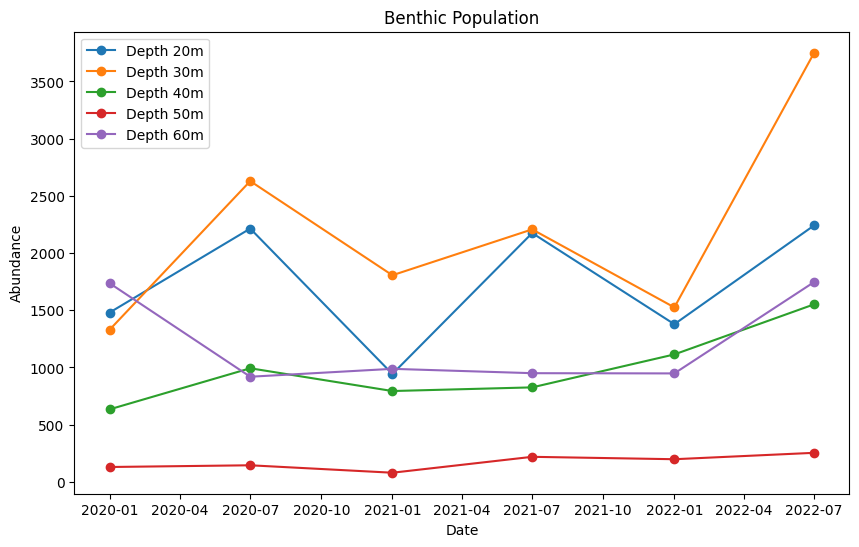

In [1355]:
# plot benthic invertebrate abundance over time at different depths

depths = benthic_pop_rotated.columns.tolist()

plt.figure(figsize=(10, 6))
for depth in depths:
    plt.plot(benthic_pop_rotated.index, benthic_pop_rotated[depth], label=f"Depth {depth}m", marker='o')

plt.xlabel("Date")
plt.ylabel("Abundance")
plt.title("Benthic Population")
plt.legend()
plt.show()


Benthic populations have largely been consistent except for a large spike in 07-2022 at 20m and an upward trend for 60m and 40m. 

Invertebrates at depth 20m have regularly fluctuating populations based on the time of year. 

Depth 50m has the lowest populations. 

Note: for all water data plots, the data is plotted on the same axis. So we're more looking at the trends of the data rather than the actual values. 

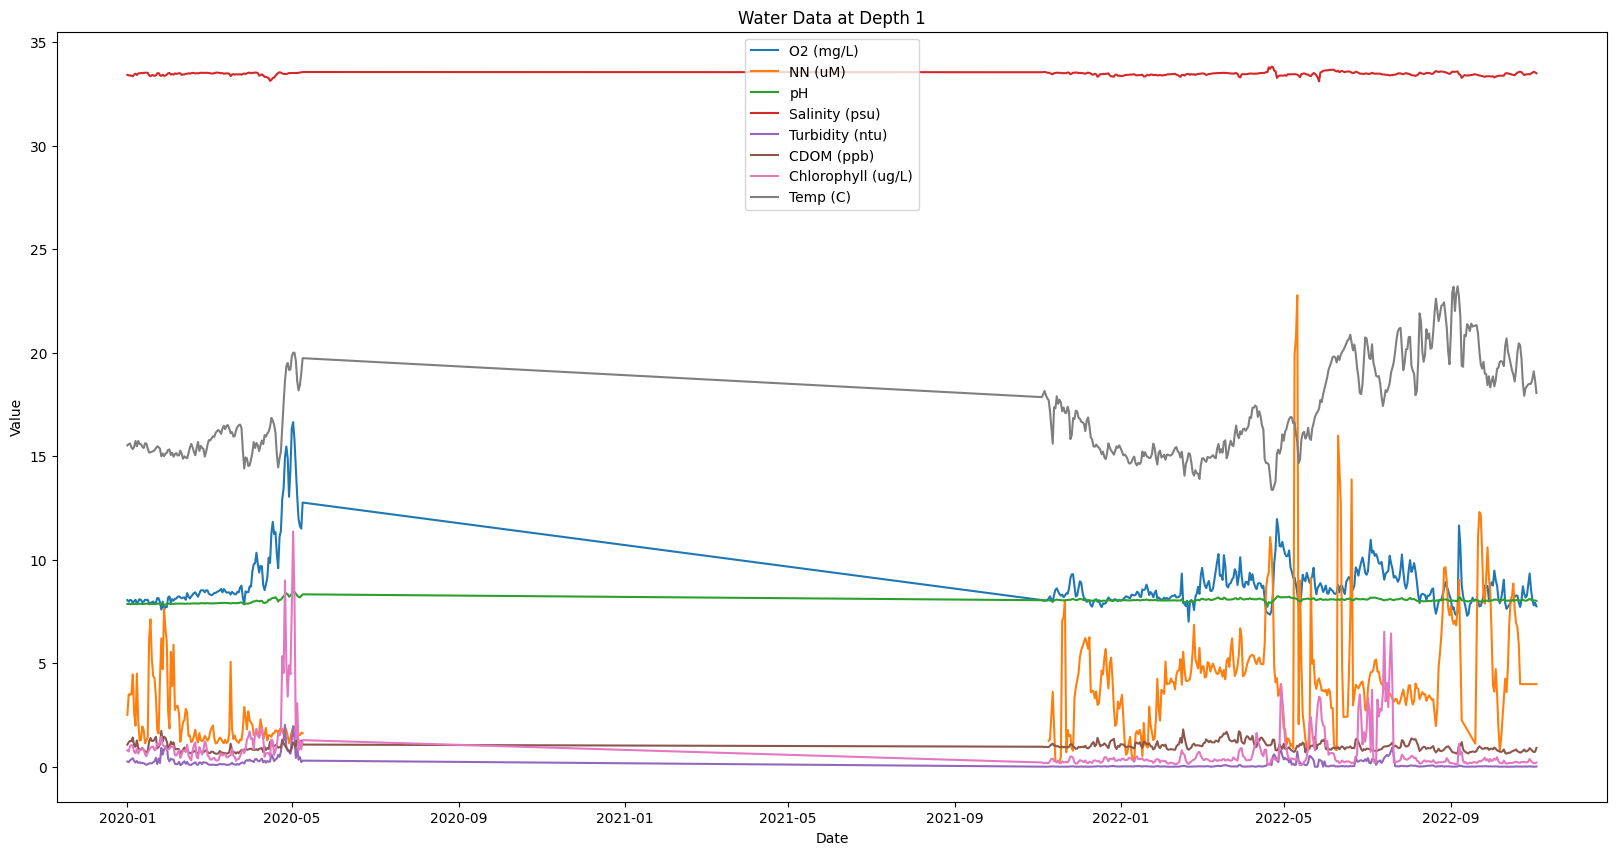

In [1356]:
# plot water data at depth 1
plt.figure(figsize=(20, 10))
plt.plot(water_data_1['date'], water_data_1['o2_mg/L'], label='O2 (mg/L)')
plt.plot(water_data_1['date'], water_data_1['nn_uM'], label='NN (uM)')
# not plotting xco2 with the others because it zooms the graph out too much
plt.plot(water_data_1['date'], water_data_1['ph'], label='pH')
plt.plot(water_data_1['date'], water_data_1['salinity_psu'], label='Salinity (psu)')
plt.plot(water_data_1['date'], water_data_1['turb_ntu'], label='Turbidity (ntu)')
plt.plot(water_data_1['date'], water_data_1['cdom_ppb'], label='CDOM (ppb)')
plt.plot(water_data_1['date'], water_data_1['chlf_ug/L'], label='Chlorophyll (ug/L)')
plt.plot(water_data_1['date'], water_data_1['temp_C'], label='Temp (C)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Water Data at Depth 1')
plt.legend(loc='upper center')
plt.show()


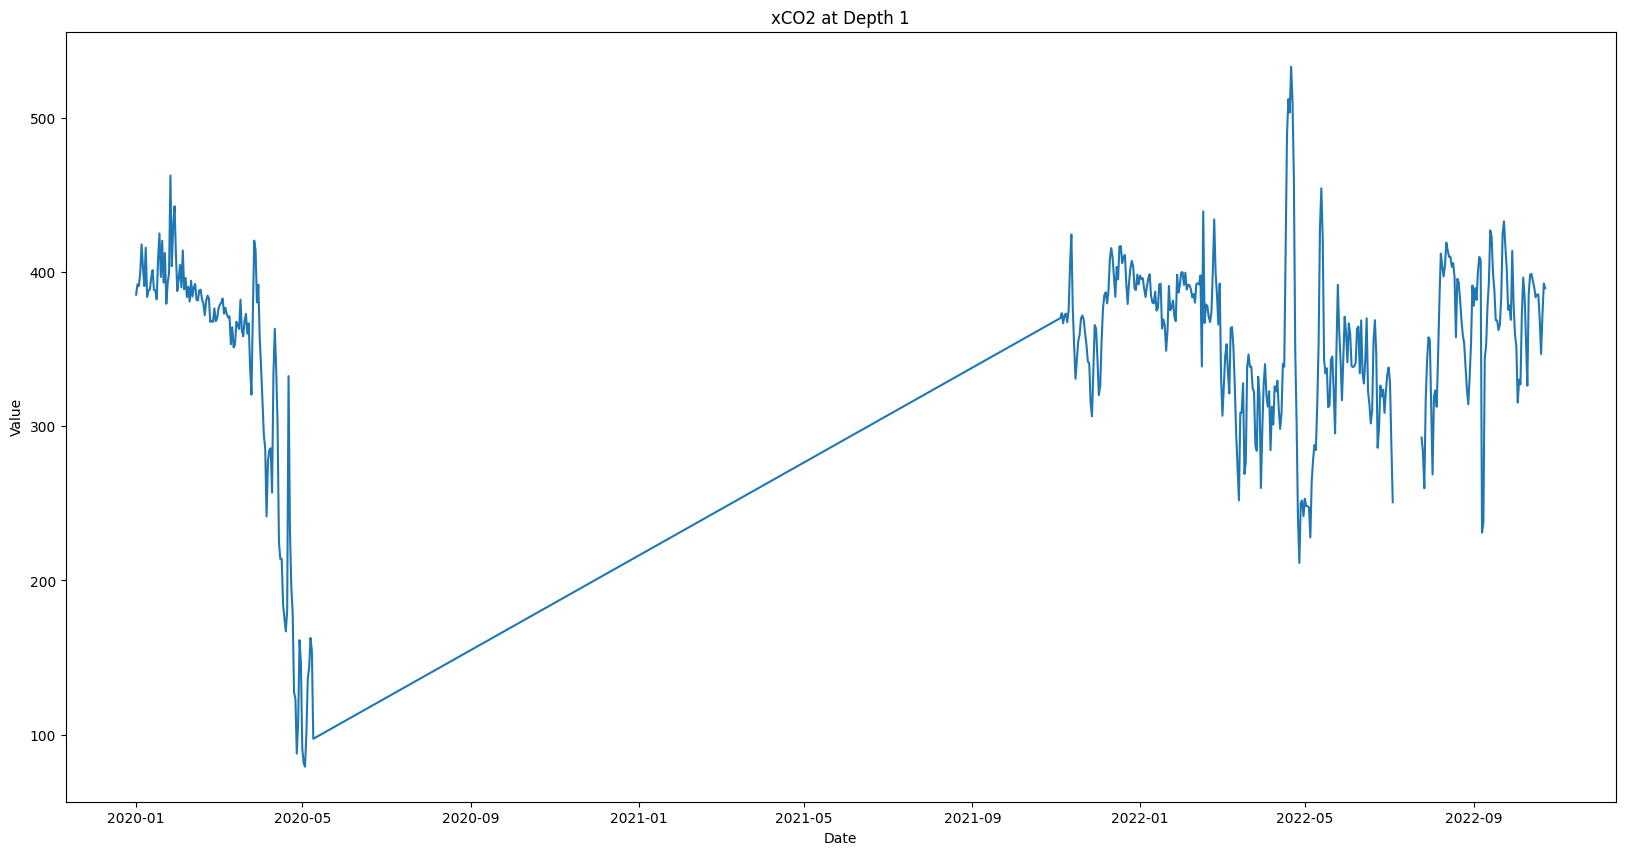

In [1357]:
# plot xco2 
plt.figure(figsize=(20, 10))
plt.plot(water_data_1['date'], water_data_1['xco2_ppm'], label='xCO2 (ppm)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('xCO2 at Depth 1')
plt.show()


Several measurements spiked in 05-2020. 

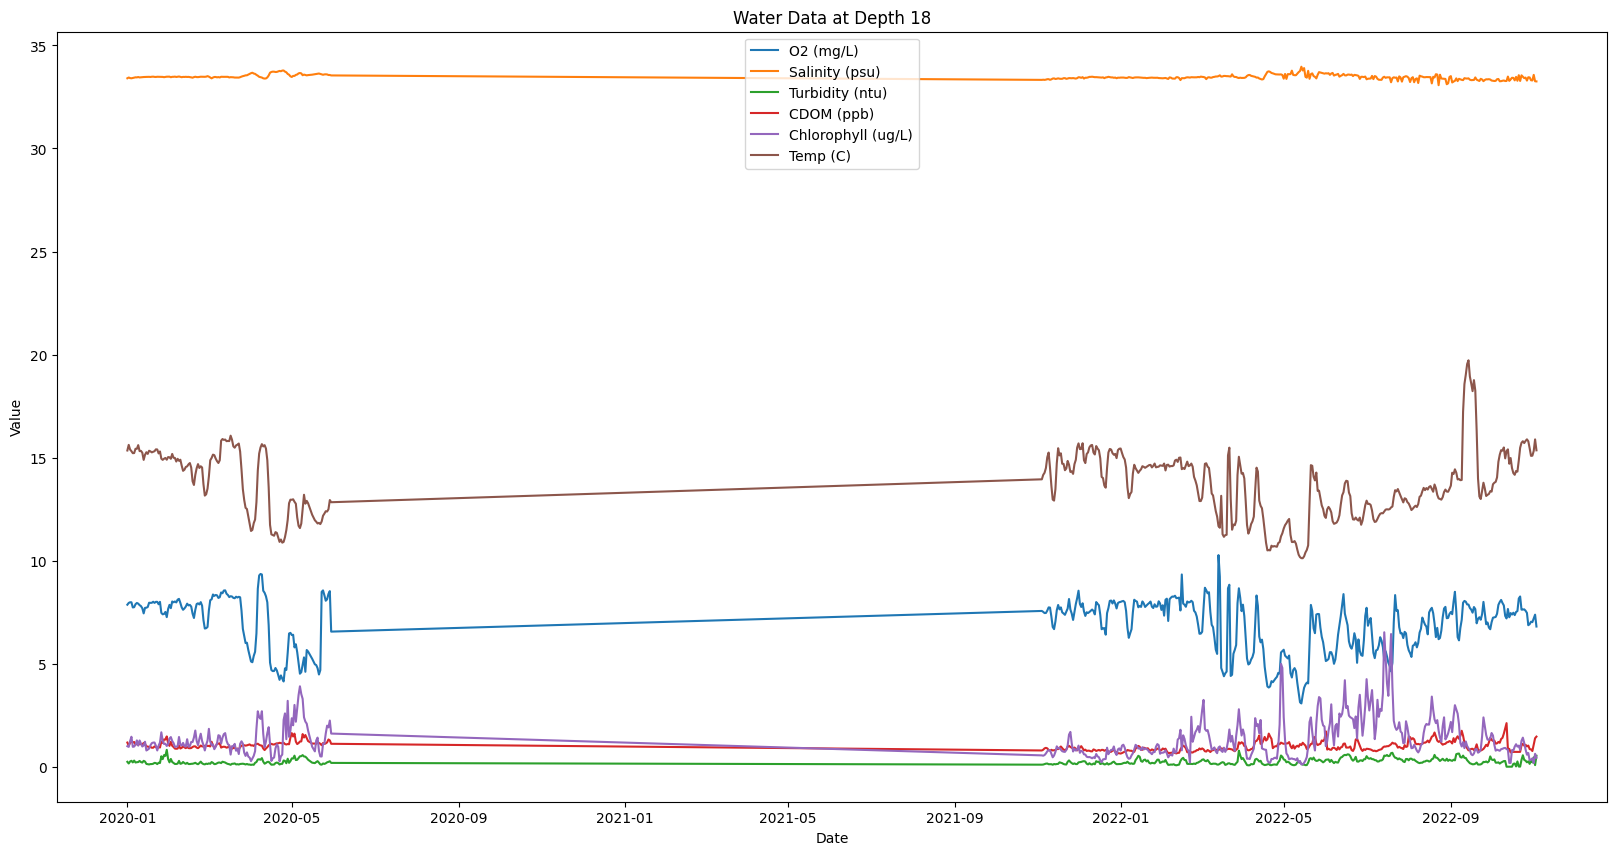

In [1358]:
# plot water data at depth 18
plt.figure(figsize=(20, 10))
plt.plot(water_data_18['date'], water_data_18['o2_mg/L'], label='O2 (mg/L)')
plt.plot(water_data_18['date'], water_data_18['salinity_psu'], label='Salinity (psu)')
plt.plot(water_data_18['date'], water_data_18['turb_ntu'], label='Turbidity (ntu)')
plt.plot(water_data_18['date'], water_data_18['cdom_ppb'], label='CDOM (ppb)')
plt.plot(water_data_18['date'], water_data_18['chlf_ug/L'], label='Chlorophyll (ug/L)')
plt.plot(water_data_18['date'], water_data_18['temp_C'], label='Temp (C)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Water Data at Depth 18')
plt.legend(loc='upper center')
plt.show()


Several measurements started fluctuating around 03-2022. 

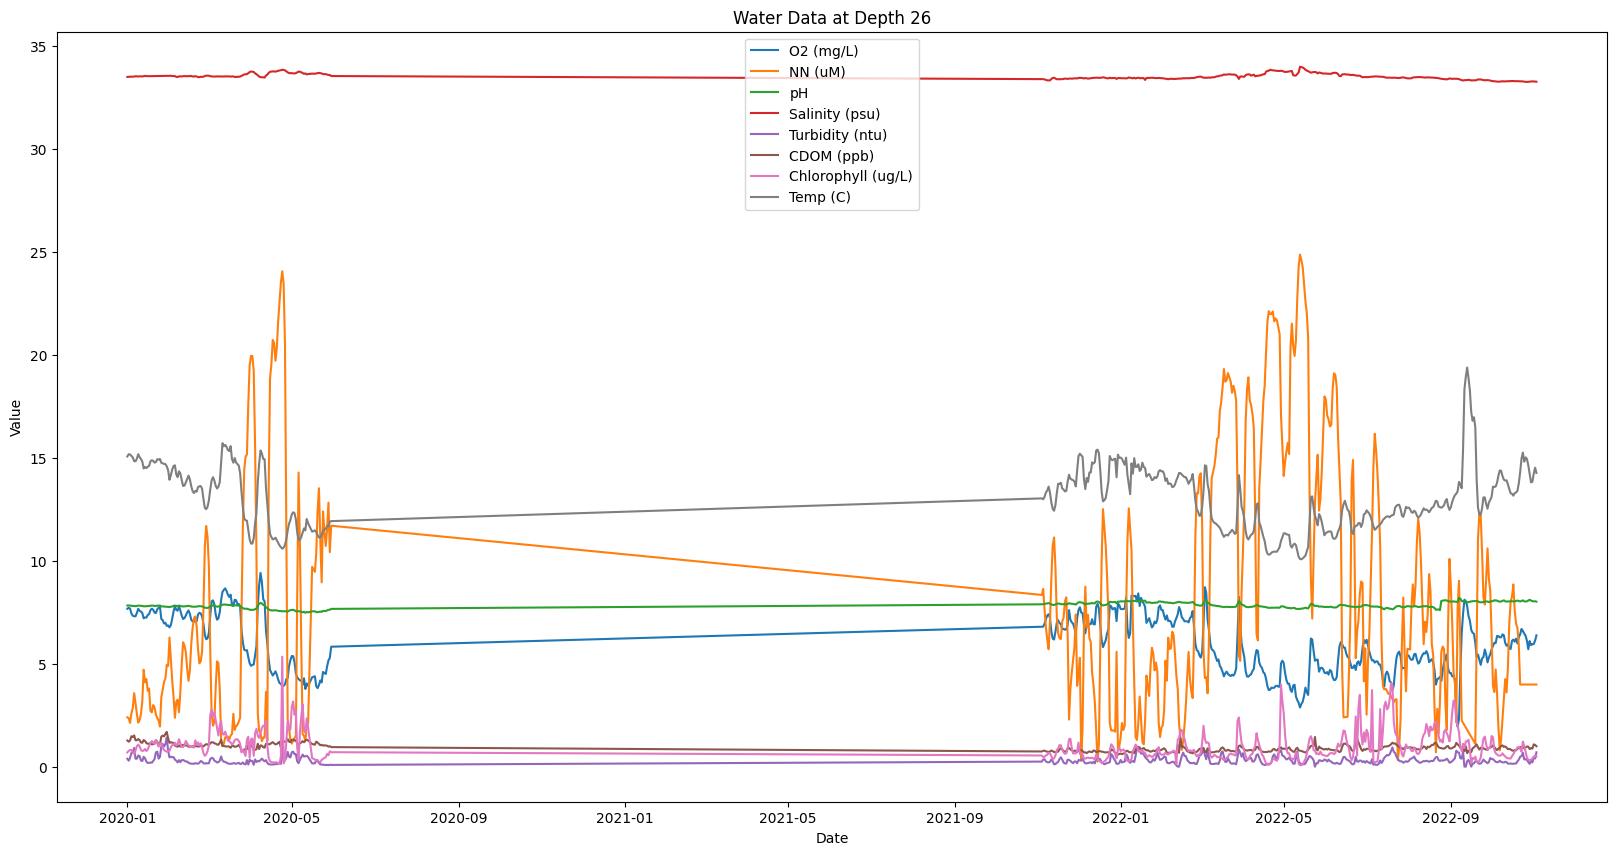

In [1359]:
# plot water data at depth 26
plt.figure(figsize=(20, 10))
plt.plot(water_data_26['date'], water_data_26['o2_mg/L'], label='O2 (mg/L)')
plt.plot(water_data_26['date'], water_data_26['nn_uM'], label='NN (uM)')
plt.plot(water_data_26['date'], water_data_26['ph'], label='pH')
plt.plot(water_data_26['date'], water_data_26['salinity_psu'], label='Salinity (psu)')
plt.plot(water_data_26['date'], water_data_26['turb_ntu'], label='Turbidity (ntu)')
plt.plot(water_data_26['date'], water_data_26['cdom_ppb'], label='CDOM (ppb)')
# not plotting bod because it is too small to see any trends
plt.plot(water_data_26['date'], water_data_26['chlf_ug/L'], label='Chlorophyll (ug/L)')
plt.plot(water_data_26['date'], water_data_26['temp_C'], label='Temp (C)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Water Data at Depth 26')
plt.legend(loc='upper center')
plt.show()


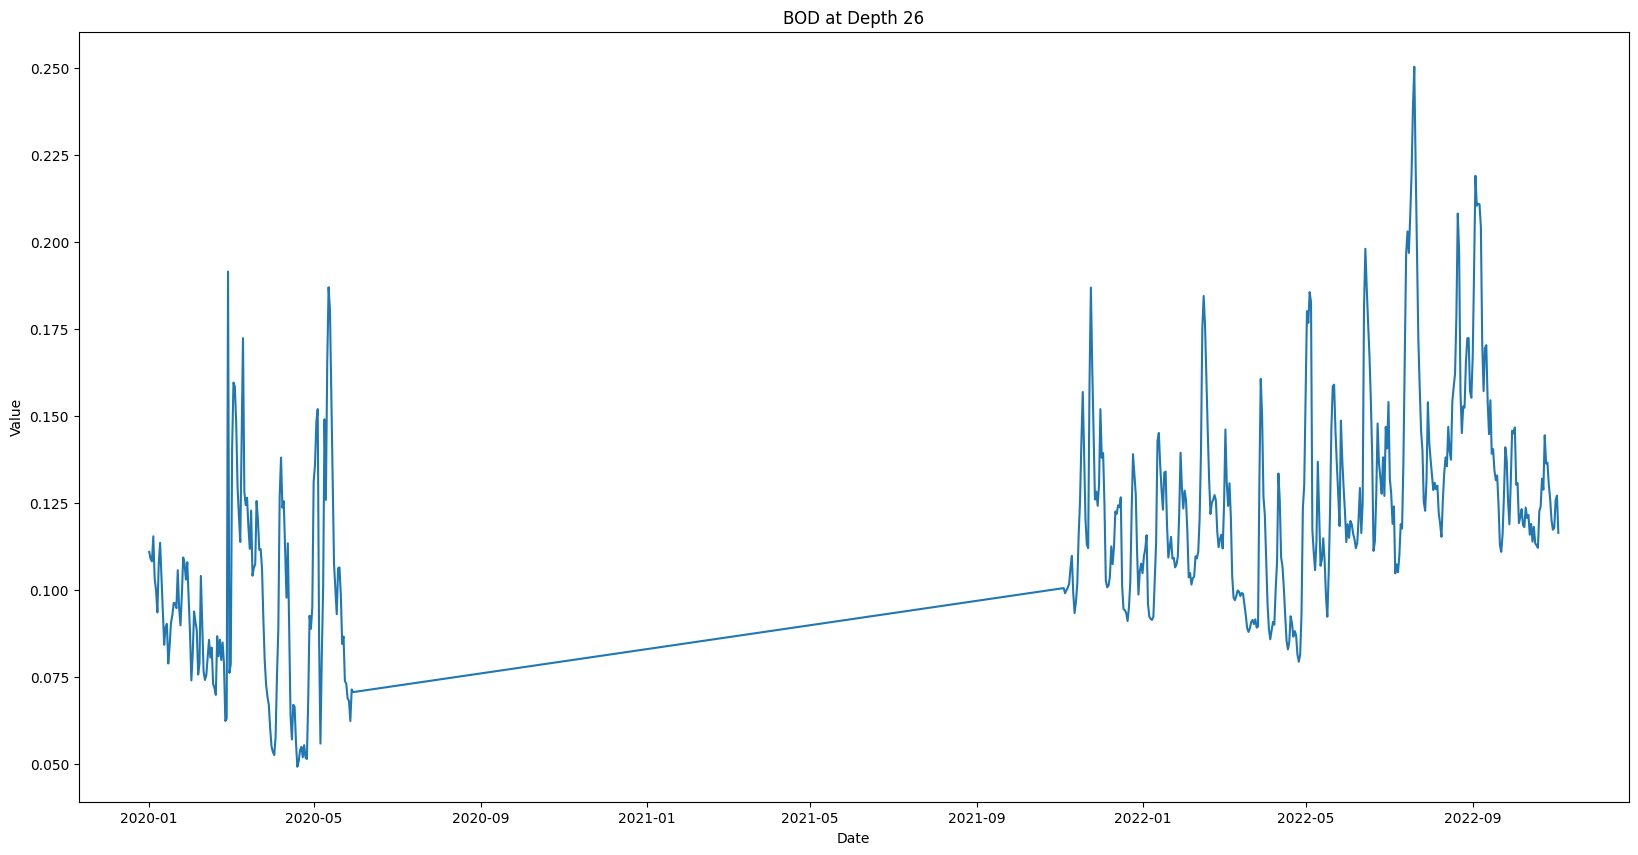

In [1360]:
# plot bod
plt.figure(figsize=(20, 10))
plt.plot(water_data_26['date'], water_data_26['bod_mg/L'], label='BOD (mg/L)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('BOD at Depth 26')
plt.show()


### Correlation

##### Depth 1

In [1361]:
# merge water data 1 with population dataframe
benthic_1 = pd.merge(water_data_1, benthic_pop_rotated, on='date', how='left')


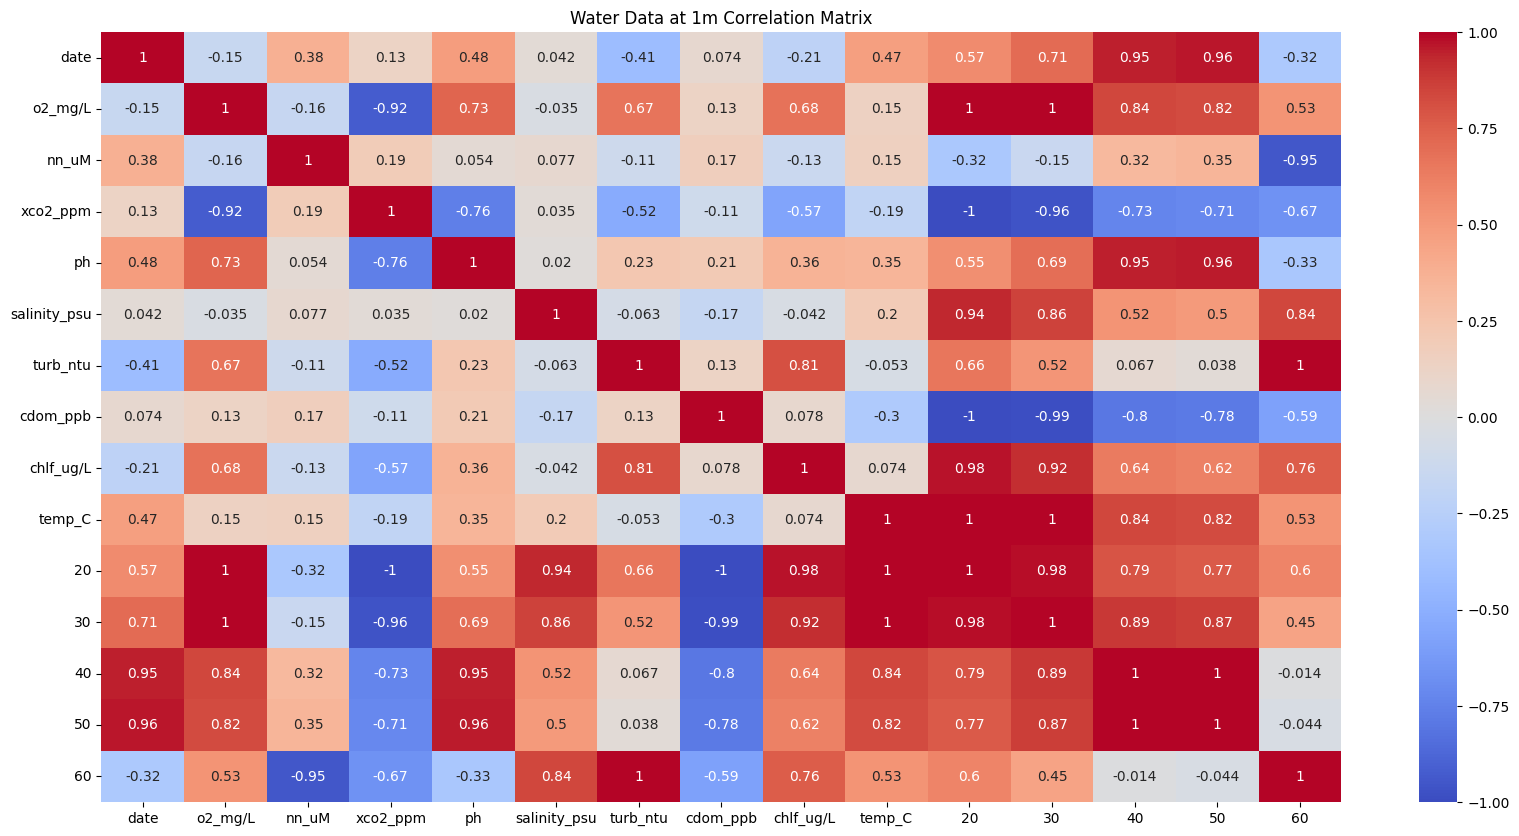

In [1362]:
# general correlation matrix - water data depth 1 
corr1 = benthic_1.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Water Data at 1m Correlation Matrix")
plt.show()


Exact correlations: 
* Abundance at 20m with temperature, CDOM, XCO2, and dissolved oxygen levels
* Abundance at 30m with temperature and dissolved oxygen levels
* Abundance at 40m with abundance at 50m
* Abundance at 60m with turbidity

Biggest correlations (over +-0.75): 
* Abundance at 20m with abundance at 30m, 40m, 50m, chlorophyll fluorescence, and salinity
* Abundance at 30m with abundance at 20m, 40m, 50m, chlorophyll fluorescence, CDOM, XCO2, and salinity
* Abundance at 40m and 50m with abundance at 30m, 20m, temperature, CDOM, pH, dissolved oxygen levels, and the date
* Abundance at 60m with chlorophyll fluorescence, salinity, and nitrate

##### Depth 18


In [1363]:
# merge water data 18 with population dataframe
benthic_18 = pd.merge(water_data_18, benthic_pop_rotated, on='date', how='left')


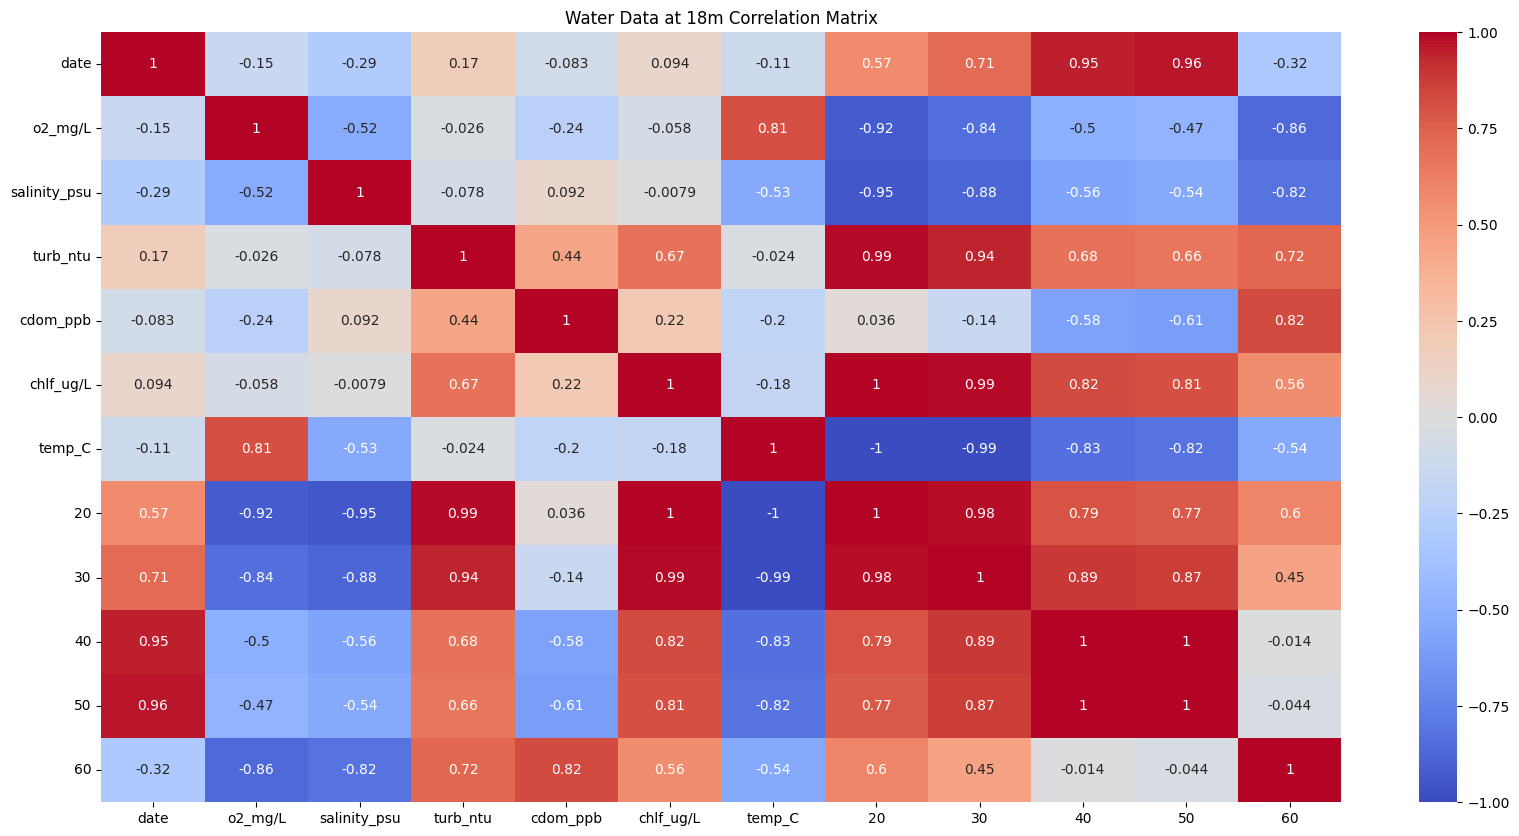

In [1364]:
# general correlation matrix - water data depth 18
corr18 = benthic_18.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr18, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Water Data at 18m Correlation Matrix")
plt.show()


Exact correlations: 
* Abundance at 20m with temperature, and chlorophyll fluorescence 
* Abundance at 40m with abundance at 50m 

Biggest correlations (over +-0.75): 
* Abundance at 20m with abundance at 30m, 40m, 50m, turbidity, salinity, and dissolved oxygen levels
* Abundance at 30m with abundance at 20m, 40m, 50m, temperature, chlorophyll fluorescence, turbidity, salinity, and dissolved oxygen levels 
* Abundance at 40m and 50m with abundance at 30m, 20m, temperature, chlorophyll fluorescence, and the date 
* Abundance at 60m with CDOM, salinity, and dissolved oxygen levels 

##### Depth 26


In [1365]:
# merge water data 26 with population dataframe
benthic_26 = pd.merge(water_data_26, benthic_pop_rotated, on='date', how='left')


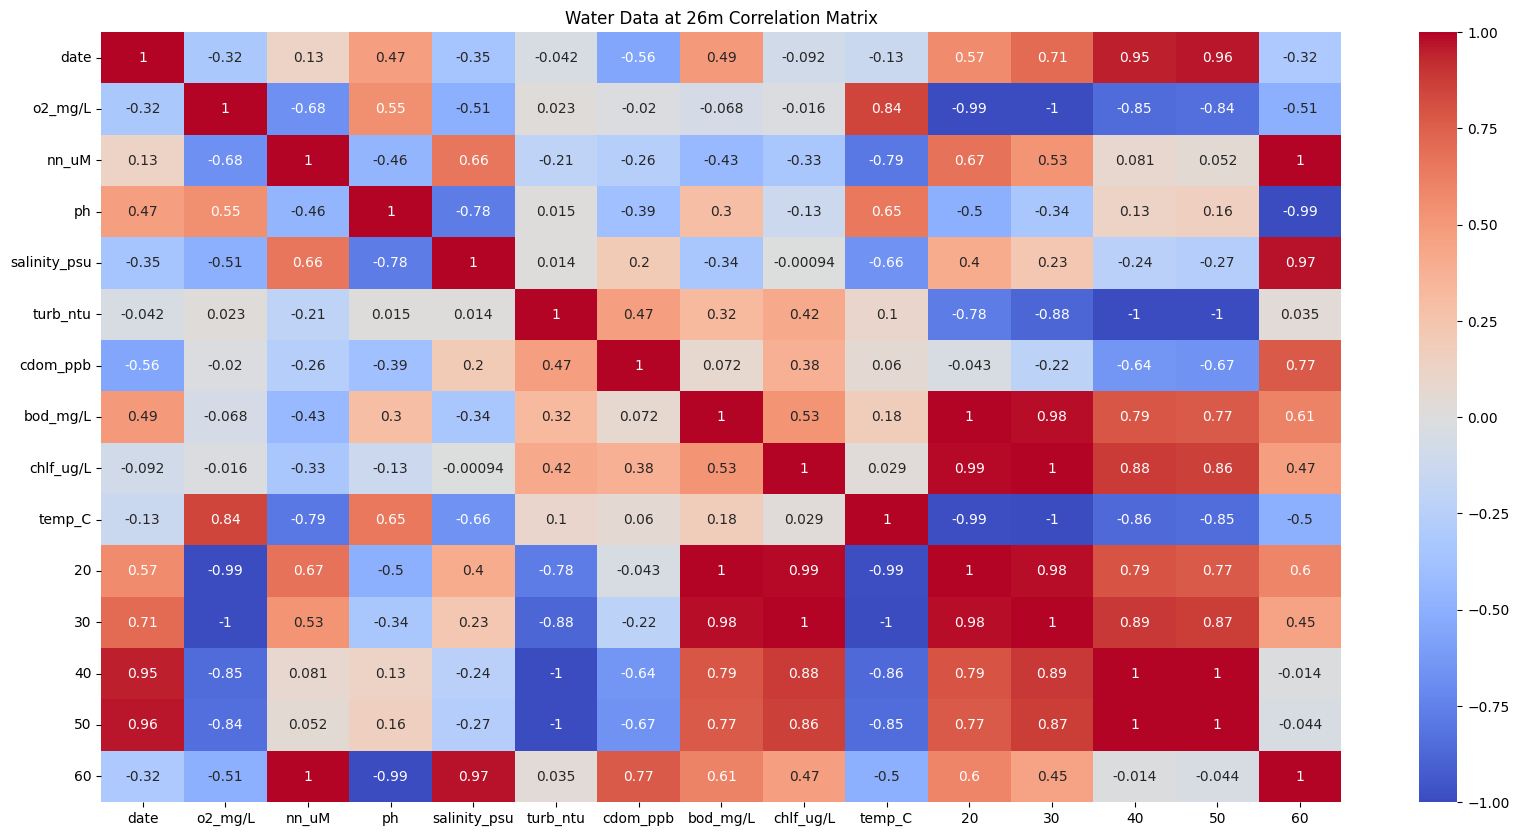

In [1366]:
# general correlation matrix - water data depth 26
corr26 = benthic_26.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr26, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Water Data at 26m Correlation Matrix")
plt.show()


Biggest correlations (over +-0.75): 
* Abundance at 20m with abundance at 30m, temperature, chlorophyll fluorescence, BOD, nitrate, and dissolved oxygen levels
* Abundance at 30m with abundance at 20m, 40m, temperature, chlorophyll fluorescence, BOD, and turbidity
* Abundance at 40m with abundance at 30m, 50m, BOD, turbidity, and the date
* Abundance at 50m with abundance at 40m, turbidity, and the date

## Modeling

In [1367]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [1368]:
# forward fill population data
benthic_1 = benthic_1.ffill()
benthic_18 = benthic_18.ffill()
benthic_26 = benthic_26.ffill()


In [1369]:
# make date unix time so it is a compatible number for the model
benthic_1['unixtime'] = benthic_1['date'].apply(lambda x: x.timestamp())
benthic_18['unixtime'] = benthic_18['date'].apply(lambda x: x.timestamp())
benthic_26['unixtime'] = benthic_26['date'].apply(lambda x: x.timestamp())


##### Depth 1m

In [1370]:
# split data
X = benthic_1.drop(columns=[20, 30, 40, 50, 60, 'date'])  # input
y = benthic_1[[20, 30, 40, 50, 60]]  # output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1371]:
# train models
depth1_models = {}
for depth in [20, 30, 40, 50, 60]:
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train[depth])
    depth1_models[depth] = model


In [1372]:
# evaluate models
for depth, model in depth1_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test[depth], y_pred))
    r2 = r2_score(y_test[depth], y_pred)
    print(f"Depth {depth} - Root Mean Squared Error: {rmse}, R-squared: {r2}")

# there are good rmse (close to 0) and r2 (close to 1) values for all depths, but are a bit too good (implying overfitting) 

Depth 20 - Root Mean Squared Error: 0.00998392378874491, R-squared: 0.9999999992780397
Depth 30 - Root Mean Squared Error: 0.0288617888393947, R-squared: 0.9999999992847931
Depth 40 - Root Mean Squared Error: 0.010260541530134512, R-squared: 0.9999999992943253
Depth 50 - Root Mean Squared Error: 0.0013904224484666652, R-squared: 0.9999999992944341
Depth 60 - Root Mean Squared Error: 0.009731296864064092, R-squared: 0.9999999992570447


In [1373]:
# cross validate models
for depth, model in depth1_models.items():
    cv_scores = cross_val_score(model, X_train, y_train[depth], cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f"Depth {depth} - Cross-validated RMSE: {avg_rmse}")

# cross validate rmse values are very high - the model is not good at predicting unseen data


Depth 20 - Cross-validated RMSE: 41.05963192535527
Depth 30 - Cross-validated RMSE: 104.26046698732648
Depth 40 - Cross-validated RMSE: 30.453827870899993
Depth 50 - Cross-validated RMSE: 4.042857148551035
Depth 60 - Cross-validated RMSE: 53.57995664526618


##### Depth 18m


In [1374]:
# split data
X = benthic_18.drop(columns=[20, 30, 40, 50, 60, 'date'])  # input
y = benthic_18[[20, 30, 40, 50, 60]]  # output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1375]:
# train models
depth18_models = {}
for depth in [20, 30, 40, 50, 60]:
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train[depth])
    depth18_models[depth] = model
    

In [1376]:
# evaluate models
for depth, model in depth18_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test[depth], y_pred))
    r2 = r2_score(y_test[depth], y_pred)
    print(f"Depth {depth} - Root Mean Squared Error: {rmse}, R-squared: {r2}")
    
# there are good rmse (close to 0) and r2 (close to 1) values for all depths, but are a bit too good (implying overfitting) 

Depth 20 - Root Mean Squared Error: 0.00890531029599258, R-squared: 0.9999999992887565
Depth 30 - Root Mean Squared Error: 0.025645723170660273, R-squared: 0.9999999992871772
Depth 40 - Root Mean Squared Error: 0.009563860564639095, R-squared: 0.9999999992862166
Depth 50 - Root Mean Squared Error: 0.0013019436734145566, R-squared: 0.9999999992863046
Depth 60 - Root Mean Squared Error: 0.010026591507216772, R-squared: 0.9999999992944526


In [1377]:
# cross validate models
for depth, model in depth18_models.items():
    cv_scores = cross_val_score(model, X_train, y_train[depth], cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f"Depth {depth} - Cross-validated RMSE: {avg_rmse}")
    
# cross validate rmse values are very high - the model is not good at predicting unseen data


Depth 20 - Cross-validated RMSE: 22.406628916395512
Depth 30 - Cross-validated RMSE: 55.45855281680048
Depth 40 - Cross-validated RMSE: 29.349966798735387
Depth 50 - Cross-validated RMSE: 4.070315680153302
Depth 60 - Cross-validated RMSE: 49.40369097801075


##### Depth 26m

In [1378]:
# split data
X = benthic_26.drop(columns=[20, 30, 40, 50, 60, 'date'])  # input
y = benthic_26[[20, 30, 40, 50, 60]]  # output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1379]:
# train models
depth26_models = {}
for depth in [20, 30, 40, 50, 60]:
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train[depth])
    depth26_models[depth] = model


In [1380]:
# evaluate models
for depth, model in depth26_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test[depth], y_pred))
    r2 = r2_score(y_test[depth], y_pred)
    print(f"Depth {depth} - Root Mean Squared Error: {rmse}, R-squared: {r2}")

# there are good rmse (close to 0) and r2 (close to 1) values for all depths, but are a bit too good (implying overfitting)

Depth 20 - Root Mean Squared Error: 0.00890531029599258, R-squared: 0.9999999992887565
Depth 30 - Root Mean Squared Error: 0.025645723170702576, R-squared: 0.9999999992871772
Depth 40 - Root Mean Squared Error: 0.009563860564637861, R-squared: 0.9999999992862166
Depth 50 - Root Mean Squared Error: 0.0013019436734138783, R-squared: 0.9999999992863046
Depth 60 - Root Mean Squared Error: 0.010026591507190414, R-squared: 0.9999999992944526


In [1381]:
# cross validate models
for depth, model in depth26_models.items():
    cv_scores = cross_val_score(model, X_train, y_train[depth], cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f"Depth {depth} - Cross-validated RMSE: {avg_rmse}")
    
# cross validate rmse values are very high - the model is not good at predicting unseen data


Depth 20 - Cross-validated RMSE: 22.406628916395533
Depth 30 - Cross-validated RMSE: 55.458552816800456
Depth 40 - Cross-validated RMSE: 29.34996679873537
Depth 50 - Cross-validated RMSE: 4.070315680153298
Depth 60 - Cross-validated RMSE: 49.403690978010744
